# Capstone Project: Debt Risk Analysis and Loan Default Prediction

**Team Members:**
- Nerid Tamrakar (0852680)
- Prabesh Ghimire (0858773)
- Tasui Oni (0853659)
- Pramesh Babu Khadka (0860484)


In [1]:
# Importing Libraries
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install pyxlsb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install openpyxl


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
data= pd.read_excel('Final_LLP.xlsb')

In [5]:
data.head()

,BRANCHCODE,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,ACOPENDATE,...,COVID_PRN_EXT,COVID_INT_EXT,CLASSIFICATION,Final Classification,LLP%,LLP Amount,DCGF & Hydro Moratorium,Additional LLP,Total LLP,Remarks
0,990.0,HO,NPR,C00000727,ODA,AWC02,OVERDRAFT CORPORATE,OVERDRAFT,CB,39905.0,...,NaN,NaN,1.0Pass,Pass,1.3%,2.618083e+04,NaN,NaN,2.618083e+04,NaN
1,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,44964.0,...,NaN,NaN,1.0Pass,Pass,1.3%,5.010897e+05,NaN,NaN,5.010897e+05,NaN
2,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,43537.0,...,NaN,NaN,1.0Pass,Pass,1.3%,1.074284e+05,NaN,NaN,1.074284e+05,NaN
3,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,44287.0,...,NaN,NaN,1.0Pass,Pass,1.3%,1.288171e+06,NaN,NaN,1.288171e+06,NaN
4,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,43709.0,...,NaN,NaN,1.0Pass,Pass,1.3%,1.385334e+05,NaN,NaN,1.385334e+05,NaN


## **Exploratory Data Analysis**

In [6]:
# Data types report
data.dtypes

BRANCHCODE                 float64
STATE                       object
CYDESC                      object
CLIENTCODE                  object
SCHM_TYPE                   object
ACTYPE                      object
ACTYPEDESC                  object
LOAN_TYPE                   object
SEGMENT                     object
ACOPENDATE                 float64
INTRATE                    float64
OUTSTANDING                float64
MID_RATE                   float64
LCY_OUTSTANDING            float64
LIMIT                      float64
LIMITEXPIRYDATE            float64
EI_END_DATE                float64
NORMALACCRUED              float64
PRINOVERDUE                float64
PRIN_OVERDUE_DATE          float64
PRINODDAYS                 float64
INTERESTOVERDUE            float64
INTEREST_OVERDUE_DATE      float64
INTOVDDAYS                 float64
PENAL_INT_ON_INT           float64
COVID_PRN_EXT              float64
COVID_INT_EXT              float64
CLASSIFICATION              object
Final Classification

### A. Changing the related to column to datetime datatype

In [7]:
# date was in number format representing number of days since 1-1-1900 hence changing it to date format.
data['ACOPENDATE'] = pd.to_datetime(data['ACOPENDATE'], origin='1899-12-30', unit='D')
data['LIMITEXPIRYDATE'] = pd.to_datetime(data['LIMITEXPIRYDATE'], origin='1899-12-30', unit='D')
data['EI_END_DATE'] = pd.to_datetime(data['EI_END_DATE'], origin='1899-12-30', unit='D')
data['PRIN_OVERDUE_DATE'] = pd.to_datetime(data['PRIN_OVERDUE_DATE'], origin='1899-12-30', unit='D')
data['INTEREST_OVERDUE_DATE'] = pd.to_datetime(data['INTEREST_OVERDUE_DATE'], origin='1899-12-30', unit='D')


In [8]:
# Date and Time format
data['ACOPENDATE'] = pd.to_datetime(data['ACOPENDATE'])
data['LIMITEXPIRYDATE'] = pd.to_datetime(data['LIMITEXPIRYDATE'])
data['EI_END_DATE'] = pd.to_datetime(data['EI_END_DATE'])
data['PRIN_OVERDUE_DATE'] = pd.to_datetime(data['PRIN_OVERDUE_DATE'])
data['INTEREST_OVERDUE_DATE'] = pd.to_datetime(data['INTEREST_OVERDUE_DATE'])


In [9]:
data.columns

Index(['BRANCHCODE', 'STATE', 'CYDESC', 'CLIENTCODE', 'SCHM_TYPE', 'ACTYPE',
       'ACTYPEDESC', 'LOAN_TYPE', 'SEGMENT', 'ACOPENDATE', 'INTRATE',
       'OUTSTANDING', 'MID_RATE', 'LCY_OUTSTANDING', 'LIMIT',
       'LIMITEXPIRYDATE', 'EI_END_DATE', 'NORMALACCRUED', 'PRINOVERDUE',
       'PRIN_OVERDUE_DATE', 'PRINODDAYS', 'INTERESTOVERDUE',
       'INTEREST_OVERDUE_DATE', 'INTOVDDAYS', 'PENAL_INT_ON_INT',
       'COVID_PRN_EXT', 'COVID_INT_EXT', 'CLASSIFICATION',
       'Final Classification', 'LLP%', 'LLP Amount', 'DCGF & Hydro Moratorium',
       'Additional LLP', 'Total LLP', 'Remarks'],
      dtype='object')

In [10]:
data.dtypes

BRANCHCODE                        float64
STATE                              object
CYDESC                             object
CLIENTCODE                         object
SCHM_TYPE                          object
ACTYPE                             object
ACTYPEDESC                         object
LOAN_TYPE                          object
SEGMENT                            object
ACOPENDATE                 datetime64[ns]
INTRATE                           float64
OUTSTANDING                       float64
MID_RATE                          float64
LCY_OUTSTANDING                   float64
LIMIT                             float64
LIMITEXPIRYDATE            datetime64[ns]
EI_END_DATE                datetime64[ns]
NORMALACCRUED                     float64
PRINOVERDUE                       float64
PRIN_OVERDUE_DATE          datetime64[ns]
PRINODDAYS                        float64
INTERESTOVERDUE                   float64
INTEREST_OVERDUE_DATE      datetime64[ns]
INTOVDDAYS                        

In [11]:
# Statistical summary
data.describe()

,BRANCHCODE,ACOPENDATE,INTRATE,OUTSTANDING,MID_RATE,LCY_OUTSTANDING,LIMIT,LIMITEXPIRYDATE,EI_END_DATE,NORMALACCRUED,...,PRINODDAYS,INTERESTOVERDUE,INTEREST_OVERDUE_DATE,INTOVDDAYS,PENAL_INT_ON_INT,COVID_PRN_EXT,COVID_INT_EXT,LLP Amount,DCGF & Hydro Moratorium,Total LLP
count,54680.000000,54671,54671.000000,5.467100e+04,54671.000000,5.468500e+04,5.467200e+04,54671,43360,5.467200e+04,...,13211.000000,5.467200e+04,19431,19431.000000,5.467100e+04,0.0,0.0,5.468200e+04,4.597000e+03,5.468100e+04
mean,108.489082,2021-03-16 01:18:40.542883584,11.699808,-3.537633e+06,1.239883,7.214605e+06,9.111243e+06,2027-01-18 16:45:30.339668480,2027-09-07 09:55:27.675276800,2.159831e+04,...,218.107032,7.956416e+04,2023-02-18 23:25:19.036590848,147.024085,4.785833e+03,NaN,NaN,3.220443e+05,2.990501e+04,2.128834e+05
min,1.000000,2002-05-17 00:00:00,0.000000,-2.464160e+09,1.000000,0.000000e+00,0.000000e+00,2007-05-16 00:00:00,2007-05-16 00:00:00,-2.916137e+05,...,0.000000,-1.183062e+05,2010-01-14 00:00:00,0.000000,-1.939713e+04,NaN,NaN,0.000000e+00,6.741052e+01,0.000000e+00
25%,28.000000,2020-02-04 00:00:00,11.480000,-2.947213e+06,1.000000,2.990718e+05,6.000000e+05,2023-09-14 00:00:00,2023-10-03 00:00:00,0.000000e+00,...,6.000000,0.000000e+00,2023-04-04 00:00:00,0.000000,0.000000e+00,NaN,NaN,5.857560e+03,4.673333e+03,3.671370e+03
50%,79.000000,2021-08-20 00:00:00,12.460000,-1.057857e+06,1.000000,1.063879e+06,1.500000e+06,2024-07-18 00:00:00,2026-02-10 00:00:00,2.666700e+02,...,44.000000,0.000000e+00,2023-07-10 00:00:00,6.000000,0.000000e+00,NaN,NaN,1.766293e+04,6.456941e+03,1.720007e+04
75%,137.000000,2023-01-03 00:00:00,13.810000,-2.950000e+05,1.000000,2.964485e+06,4.000000e+06,2028-08-10 00:00:00,2029-12-10 00:00:00,2.439493e+03,...,213.000000,3.514303e+03,2023-07-16 00:00:00,103.000000,6.280000e+00,NaN,NaN,4.807193e+04,9.732502e+03,4.720192e+04
max,990.000000,2023-07-16 00:00:00,20.490000,0.000000e+00,147.662290,1.972652e+11,2.490649e+11,2099-12-31 00:00:00,2065-10-10 00:00:00,5.904115e+08,...,3419.000000,2.174966e+09,2023-07-16 00:00:00,4931.000000,2.713091e+07,NaN,NaN,5.870220e+09,1.218748e+07,5.820338e+09
std,158.052235,NaN,3.278671,2.265740e+07,5.605462,8.438613e+08,1.065611e+09,NaN,NaN,2.528059e+06,...,426.064575,9.319740e+06,NaN,350.242633,1.331947e+05,NaN,NaN,3.552553e+07,2.161190e+05,2.492824e+07


In [12]:
# Checking for the null values
data.isnull().sum()

BRANCHCODE                     9
STATE                          9
CYDESC                         9
CLIENTCODE                     9
SCHM_TYPE                      9
ACTYPE                         9
ACTYPEDESC                     9
LOAN_TYPE                      9
SEGMENT                        9
ACOPENDATE                    18
INTRATE                       18
OUTSTANDING                   18
MID_RATE                      18
LCY_OUTSTANDING                4
LIMIT                         17
LIMITEXPIRYDATE               18
EI_END_DATE                11329
NORMALACCRUED                 17
PRINOVERDUE                   17
PRIN_OVERDUE_DATE          41478
PRINODDAYS                 41478
INTERESTOVERDUE               17
INTEREST_OVERDUE_DATE      35258
INTOVDDAYS                 35258
PENAL_INT_ON_INT              18
COVID_PRN_EXT              54689
COVID_INT_EXT              54689
CLASSIFICATION                18
Final Classification           9
LLP%                           9
LLP Amount

### B. Dealing with the null values

In [13]:
data.tail(10)

,BRANCHCODE,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,ACOPENDATE,...,COVID_PRN_EXT,COVID_INT_EXT,CLASSIFICATION,Final Classification,LLP%,LLP Amount,DCGF & Hydro Moratorium,Additional LLP,Total LLP,Remarks
54679,193.0,NPST7,NPR,R02128434,LAA,CED11,EDUCATION LOAN RETAIL,EDUCATION LOAN,RE,2023-06-27,...,NaN,NaN,1.0Pass,Pass,1.3%,5.720000e+04,NaN,NaN,5.720000e+04,NaN
54680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,5.870220e+09,NaN,Total LLP,5.820338e+09,NaN
54682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,5.869585e+09,NaN,NaN,NaN,NaN
54686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# removing the last 9 rows where subtotals and totals were done in the excel file
data = data.iloc[:-9]

In [15]:
# Removing the unnamed columns with no data
data = data.drop(data.columns[data.columns.str.contains('^Unnamed')], axis=1)

In [16]:
# Convert '7/17/2022' to a datetime object
starting_date = pd.to_datetime("7/17/2022")

# Replace null values in the 'ACOPENDATE' column with financial year starting date
data['ACOPENDATE'].fillna(starting_date, inplace=True)
data['ACOPENDATE'].isna().sum()

np.int64(0)

In [17]:
# Calculate mean of 'INTRATE' for HY Segment to replace it in missing intetest rate in HY segment
mean_intrate_hy = round(data[data['SEGMENT'] == 'HY']['INTRATE'].mean(),2)

data['INTRATE'].fillna(mean_intrate_hy, inplace=True)
data['INTRATE'].isna().sum()


np.int64(0)

In [18]:
#checking the null row before replacing
null_rows = data[data['OUTSTANDING'].isnull()][['OUTSTANDING', 'LCY_OUTSTANDING']]
null_rows

,OUTSTANDING,LCY_OUTSTANDING
224,NaN,1237500.00
226,NaN,5156500.00
411,NaN,8211.50
413,NaN,5025561.38
415,NaN,1153621.21
524,NaN,303142.52
526,NaN,1273175.15
1002,NaN,28518619.54
1003,NaN,145292.04


In [19]:
# Replacing the null values in 'OUTSTANDING' column with corresponding values in 'LCY_OUTSTANDING' column.
data['OUTSTANDING'].fillna(data['LCY_OUTSTANDING'], inplace=True)

In [20]:
# checking if replacment was successful
data['OUTSTANDING'][224]

np.float64(1237500.0)

In [21]:
# Replacing the null values in 'MID_RATE' column with 1 as all the null value is of Local currency.
data['MID_RATE'].fillna(1, inplace=True)

In [22]:
#checking the null row before replacing in Limit 
null_rows = data[data['LIMIT'].isnull()][['LIMIT', 'LCY_OUTSTANDING']]
null_rows

,LIMIT,LCY_OUTSTANDING
224,NaN,1237500.00
226,NaN,5156500.00
411,NaN,8211.50
413,NaN,5025561.38
415,NaN,1153621.21
524,NaN,303142.52
526,NaN,1273175.15
1002,NaN,28518619.54
1003,NaN,145292.04


In [23]:
# Replacing the null values in 'LIMIT' column with corresponding values in 'LCY_OUTSTANDING' column.
data['LIMIT'].fillna(data['LCY_OUTSTANDING'], inplace=True)

In [24]:
# checking if replacment was successful
data['OUTSTANDING'][224]

np.float64(1237500.0)

In [25]:
# Convert '7/17/2022' to a datetime object
end_date = pd.to_datetime("7/16/2023")

# Replace null values in the 'LIMITEXPIRYDATE' column with financial year end date
data['LIMITEXPIRYDATE'].fillna(end_date, inplace=True)
data['LIMITEXPIRYDATE'].isna().sum()

# Replace null values in the 'LIMITEXPIRYDATE' column with financial year end date
data['EI_END_DATE'].fillna(end_date, inplace=True)
data['EI_END_DATE'].isna().sum()

np.int64(0)

In [26]:
# Replacing the null values in 'NORMALACCRUED' column with 0 as all the 9 loan do not have normal accured.
data['NORMALACCRUED'].fillna(0, inplace=True)

In [27]:
#checking the null row before replacing in Limit 
null_rows = data[data['PRINOVERDUE'].isnull()][['PRINOVERDUE', 'LCY_OUTSTANDING']]
null_rows

,PRINOVERDUE,LCY_OUTSTANDING
224,NaN,1237500.00
226,NaN,5156500.00
411,NaN,8211.50
413,NaN,5025561.38
415,NaN,1153621.21
524,NaN,303142.52
526,NaN,1273175.15
1002,NaN,28518619.54
1003,NaN,145292.04


In [28]:
# Replacing the null values in 'PRINOVERDUE' column with corresponding values in 'LCY_OUTSTANDING' column.
data['PRINOVERDUE'].fillna(data['LCY_OUTSTANDING'], inplace=True)

In [29]:
# checking if replacment was successful
data['PRINOVERDUE'][224]

np.float64(1237500.0)

In [30]:
# Replacing the null values in 'PRIN_OVERDUE_DATE' column with 0 as all these loan do not have any principle overdue.
data['PRIN_OVERDUE_DATE'].fillna(0, inplace=True)

In [31]:
# Replace null values in 'PRINODDAYS' for specific client codes with 367 days overdue as these loan are bad loan
client_codes = ['C00140305', 'C00334637', 'C00342839', 'C00979581']
data.loc[data['CLIENTCODE'].isin(client_codes) & data['PRINODDAYS'].isnull(), 'PRINODDAYS'] = 367

# Replacing other null in 'PRINODDAYS' to 0 as other loans do not have overdue
data['PRINODDAYS'].fillna(0, inplace=True) 


In [32]:
# Replacing the null values followiung columns with 0.
data['INTERESTOVERDUE'].fillna(0, inplace=True)
data['INTEREST_OVERDUE_DATE'].fillna(0, inplace=True)
data['INTOVDDAYS'].fillna(0, inplace=True)
data['PENAL_INT_ON_INT'].fillna(0, inplace=True)

In [33]:
# Dropping these columns as there are no data in this columns.
data.drop(columns=['COVID_PRN_EXT', 'COVID_INT_EXT'], inplace=True)

In [34]:
# Replacing null values in CLASSIFICATION columns as 4.BAD as 9 loans are bad 
data['CLASSIFICATION'].fillna('4.Bad', inplace=True) 

In [35]:
# Replacing null values in following columns as 0 as no any addition done by any authority in these loans 
data['DCGF & Hydro Moratorium'].fillna('0', inplace=True)
data['Additional LLP'].fillna('0', inplace=True) 


In [36]:
# dropping the remarks column as has no significant influence on the data
data.drop(columns=['Remarks'], inplace=True)

In [37]:
# Checking for the null values
data.isnull().sum()

BRANCHCODE                 0
STATE                      0
CYDESC                     0
CLIENTCODE                 0
SCHM_TYPE                  0
ACTYPE                     0
ACTYPEDESC                 0
LOAN_TYPE                  0
SEGMENT                    0
ACOPENDATE                 0
INTRATE                    0
OUTSTANDING                0
MID_RATE                   0
LCY_OUTSTANDING            0
LIMIT                      0
LIMITEXPIRYDATE            0
EI_END_DATE                0
NORMALACCRUED              0
PRINOVERDUE                0
PRIN_OVERDUE_DATE          0
PRINODDAYS                 0
INTERESTOVERDUE            0
INTEREST_OVERDUE_DATE      0
INTOVDDAYS                 0
PENAL_INT_ON_INT           0
CLASSIFICATION             0
Final Classification       0
LLP%                       0
LLP Amount                 0
DCGF & Hydro Moratorium    0
Additional LLP             0
Total LLP                  0
dtype: int64

B1. Changing data types

In [38]:
data['DCGF & Hydro Moratorium'] = data['DCGF & Hydro Moratorium'].astype(int)
data['Additional LLP'] = data['Additional LLP'].astype(int)

### C. Dealing with negative value

In [39]:
# Replace negative values with 0 in specified columns as overdue cannot be in negative
columns_to_fix = ['INTERESTOVERDUE', 'PENAL_INT_ON_INT']
data[columns_to_fix] = data[columns_to_fix].applymap(lambda x: max(x, 0))

In [40]:
#data.to_excel('cleaned_data.xlsx', index=False)

In [41]:
data.columns

Index(['BRANCHCODE', 'STATE', 'CYDESC', 'CLIENTCODE', 'SCHM_TYPE', 'ACTYPE',
       'ACTYPEDESC', 'LOAN_TYPE', 'SEGMENT', 'ACOPENDATE', 'INTRATE',
       'OUTSTANDING', 'MID_RATE', 'LCY_OUTSTANDING', 'LIMIT',
       'LIMITEXPIRYDATE', 'EI_END_DATE', 'NORMALACCRUED', 'PRINOVERDUE',
       'PRIN_OVERDUE_DATE', 'PRINODDAYS', 'INTERESTOVERDUE',
       'INTEREST_OVERDUE_DATE', 'INTOVDDAYS', 'PENAL_INT_ON_INT',
       'CLASSIFICATION', 'Final Classification', 'LLP%', 'LLP Amount',
       'DCGF & Hydro Moratorium', 'Additional LLP', 'Total LLP'],
      dtype='object')

In [42]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

### D. Numerical column analysis

In [44]:
numerical_columns = data.select_dtypes(include=['number'])
numerical_columns

,BRANCHCODE,INTRATE,OUTSTANDING,MID_RATE,LCY_OUTSTANDING,LIMIT,NORMALACCRUED,PRINOVERDUE,PRINODDAYS,INTERESTOVERDUE,INTOVDDAYS,PENAL_INT_ON_INT,LLP Amount,DCGF & Hydro Moratorium,Additional LLP,Total LLP
0,990.0,12.86,-2013909.95,1.0,2013909.95,10000000.0,0.00,0.0,0.0,0.0,0.0,0.0,2.618083e+04,0,0,2.618083e+04
1,990.0,11.81,-38545363.82,1.0,38545363.82,40000000.0,865485.98,0.0,0.0,0.0,0.0,0.0,5.010897e+05,0,0,5.010897e+05
2,990.0,10.45,-8263725.72,1.0,8263725.72,100000000.0,16561.41,0.0,0.0,0.0,0.0,0.0,1.074284e+05,0,0,1.074284e+05
3,990.0,10.45,-99090062.21,1.0,99090062.21,150000000.0,198587.34,0.0,0.0,0.0,0.0,0.0,1.288171e+06,0,0,1.288171e+06
4,990.0,10.45,-10656416.89,1.0,10656416.89,50000000.0,113007.65,0.0,0.0,0.0,0.0,0.0,1.385334e+05,0,0,1.385334e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54675,193.0,11.99,-1590000.00,1.0,1590000.00,1800000.0,3656.13,0.0,0.0,0.0,0.0,0.0,2.067000e+04,0,0,2.067000e+04
54676,193.0,13.63,-3964994.73,1.0,3964994.73,4000000.0,8692.01,0.0,0.0,0.0,0.0,0.0,5.154493e+04,0,0,5.154493e+04
54677,193.0,11.99,-4983323.97,1.0,4983323.97,5000000.0,11458.91,0.0,0.0,0.0,0.0,0.0,6.478321e+04,0,0,6.478321e+04
54678,193.0,11.99,-1765046.94,1.0,1765046.94,2350000.0,4058.64,0.0,0.0,0.0,0.0,0.0,2.294561e+04,0,0,2.294561e+04


In [45]:
numerical_columns.columns

Index(['BRANCHCODE', 'INTRATE', 'OUTSTANDING', 'MID_RATE', 'LCY_OUTSTANDING',
       'LIMIT', 'NORMALACCRUED', 'PRINOVERDUE', 'PRINODDAYS',
       'INTERESTOVERDUE', 'INTOVDDAYS', 'PENAL_INT_ON_INT', 'LLP Amount',
       'DCGF & Hydro Moratorium', 'Additional LLP', 'Total LLP'],
      dtype='object')

In [46]:
numerical_columns.describe()

,BRANCHCODE,INTRATE,OUTSTANDING,MID_RATE,LCY_OUTSTANDING,LIMIT,NORMALACCRUED,PRINOVERDUE,PRINODDAYS,INTERESTOVERDUE,INTOVDDAYS,PENAL_INT_ON_INT,LLP Amount,DCGF & Hydro Moratorium,Additional LLP,Total LLP
count,54680.000000,54680.000000,5.468000e+04,54680.000000,5.468000e+04,5.468000e+04,5.468000e+04,5.468000e+04,54680.000000,5.468000e+04,54680.000000,5.468000e+04,5.468000e+04,5.468000e+04,5.468000e+04,5.468000e+04
mean,108.489082,11.699655,-3.536267e+06,1.239844,3.607630e+06,4.555738e+06,1.079758e+04,1.183357e+05,52.803292,3.978299e+04,52.246251,4.785441e+03,1.073559e+05,2.514101e+03,1.601893e+03,1.064436e+05
std,158.052235,3.278423,2.265605e+07,5.605002,2.309338e+07,3.038602e+07,1.239740e+05,1.471034e+06,229.349393,5.796560e+05,220.322983,1.331837e+05,1.381808e+06,6.320457e+04,8.789584e+04,1.383179e+06
min,1.000000,0.000000,-2.464160e+09,1.000000,0.000000e+00,0.000000e+00,-2.916137e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,28.000000,11.480000,-2.947000e+06,1.000000,2.991762e+05,6.000000e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,5.856608e+03,0.000000e+00,0.000000e+00,3.671370e+03
50%,79.000000,12.460000,-1.057592e+06,1.000000,1.063987e+06,1.500000e+06,2.664700e+02,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.766240e+04,0.000000e+00,0.000000e+00,1.719953e+04
75%,137.000000,13.810000,-2.949659e+05,1.000000,2.964595e+06,4.000000e+06,2.439130e+03,0.000000e+00,0.000000,3.509680e+03,0.000000,6.262500e+00,4.805318e+04,0.000000e+00,0.000000e+00,4.720192e+04
max,990.000000,20.490000,2.851862e+07,147.662290,2.464160e+09,4.065146e+09,1.040358e+07,9.819386e+07,3419.000000,1.093514e+08,4931.000000,2.713091e+07,2.000000e+08,1.218748e+07,1.200000e+07,2.000000e+08


In [47]:
#drop unneccessary columns
numerical_columns = numerical_columns.drop(columns = ['BRANCHCODE','OUTSTANDING','LLP Amount','MID_RATE'])

In [48]:
numerical_columns

,INTRATE,LCY_OUTSTANDING,LIMIT,NORMALACCRUED,PRINOVERDUE,PRINODDAYS,INTERESTOVERDUE,INTOVDDAYS,PENAL_INT_ON_INT,DCGF & Hydro Moratorium,Additional LLP,Total LLP
0,12.86,2013909.95,10000000.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,2.618083e+04
1,11.81,38545363.82,40000000.0,865485.98,0.0,0.0,0.0,0.0,0.0,0,0,5.010897e+05
2,10.45,8263725.72,100000000.0,16561.41,0.0,0.0,0.0,0.0,0.0,0,0,1.074284e+05
3,10.45,99090062.21,150000000.0,198587.34,0.0,0.0,0.0,0.0,0.0,0,0,1.288171e+06
4,10.45,10656416.89,50000000.0,113007.65,0.0,0.0,0.0,0.0,0.0,0,0,1.385334e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
54675,11.99,1590000.00,1800000.0,3656.13,0.0,0.0,0.0,0.0,0.0,0,0,2.067000e+04
54676,13.63,3964994.73,4000000.0,8692.01,0.0,0.0,0.0,0.0,0.0,0,0,5.154493e+04
54677,11.99,4983323.97,5000000.0,11458.91,0.0,0.0,0.0,0.0,0.0,0,0,6.478321e+04
54678,11.99,1765046.94,2350000.0,4058.64,0.0,0.0,0.0,0.0,0.0,0,0,2.294561e+04


<Axes: >

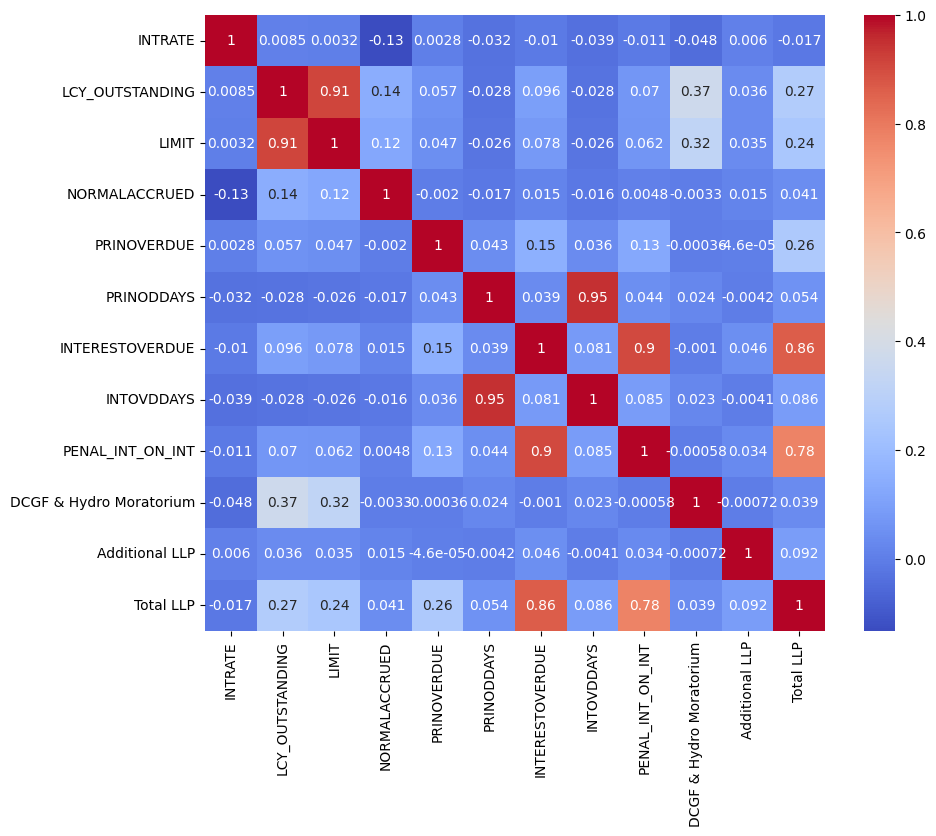

In [49]:
#correlation matrix
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix , annot= True, cmap='coolwarm')

In [50]:
#Interest rate bins
bins = range(0, 25, 5)
labels = [f"{i} - {i + 5}" for i in bins[:-1]]

numerical_columns['INTRATE_bin'] = pd.cut(numerical_columns['INTRATE'], bins = bins, labels= labels, right = False)

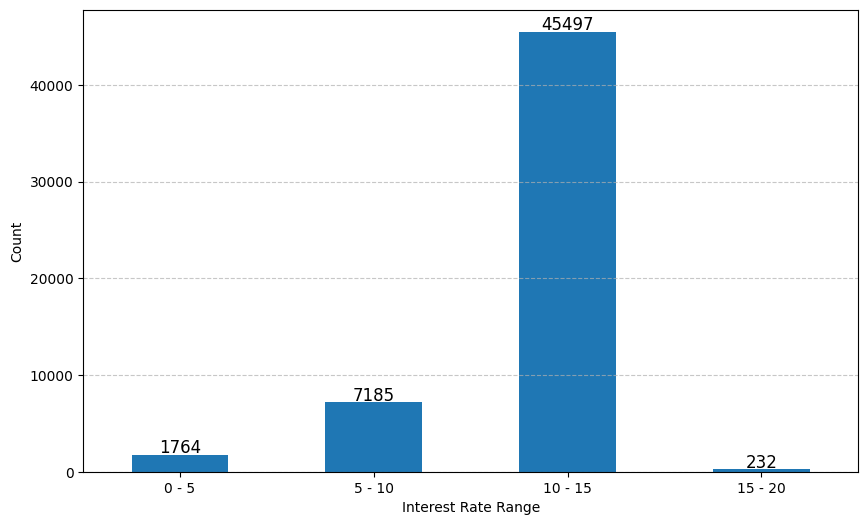

In [51]:
#plot of interest rate range
plt.figure(figsize=(10,6))
ax = numerical_columns['INTRATE_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Interest Rate Range')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

In [52]:
#Outstanding bin
bins = [0, 1e6, 5e6, 10e6, 100e6, float('inf')]
labels = ['0-1M', '1M-5M', '5M-10M', '10M-100M', '100M +']
numerical_columns['LCY_OUTSTANDING_bin'] = pd.cut(numerical_columns['LCY_OUTSTANDING'], bins=bins, labels=labels, include_lowest=True)


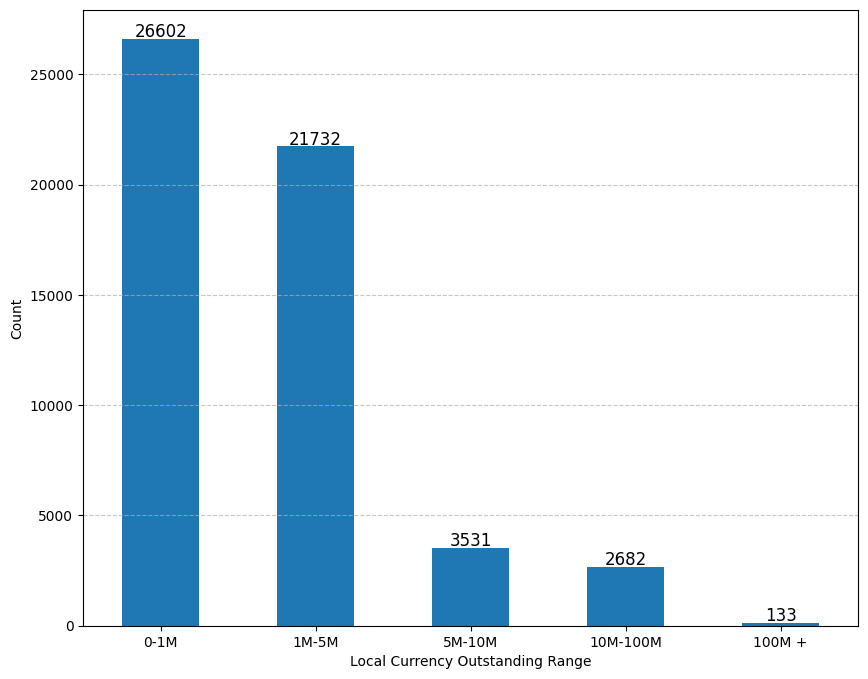

In [53]:
#plot for outstanding bin
plt.figure(figsize=(10,8))
ax = numerical_columns['LCY_OUTSTANDING_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Local Currency Outstanding Range')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

In [54]:
#Limit bin
bins = [0, 1e6, 5e6, 10e6, 100e6, float('inf')]
labels = ['0-1M', '1M-5M', '5M-10M', '10M-100M', '100M +']
numerical_columns['LIMIT_bin'] = pd.cut(numerical_columns['LIMIT'], bins=bins, labels=labels, include_lowest=True)


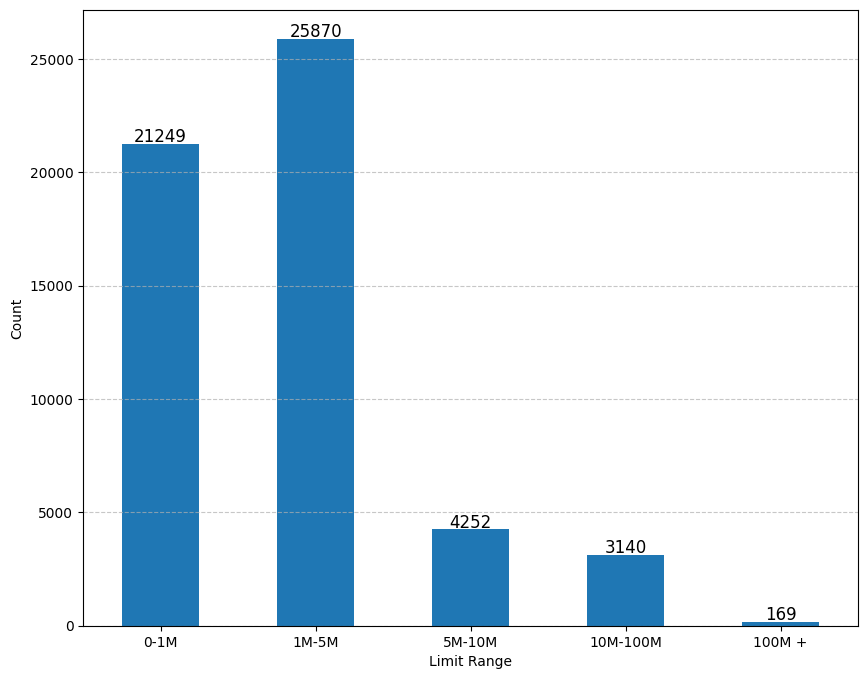

In [55]:
#plot for limit bin
plt.figure(figsize=(10,8))
ax = numerical_columns['LIMIT_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Limit Range')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [56]:
#normal accured bins
bins = [0, 10e3, 50e3, float('inf')]
labels = ['0-10K', '10K-50K', '50K+']

numerical_columns['NORMALACCRUED_bin'] = pd.cut(numerical_columns['NORMALACCRUED'], bins = bins, labels = labels, include_lowest=True)

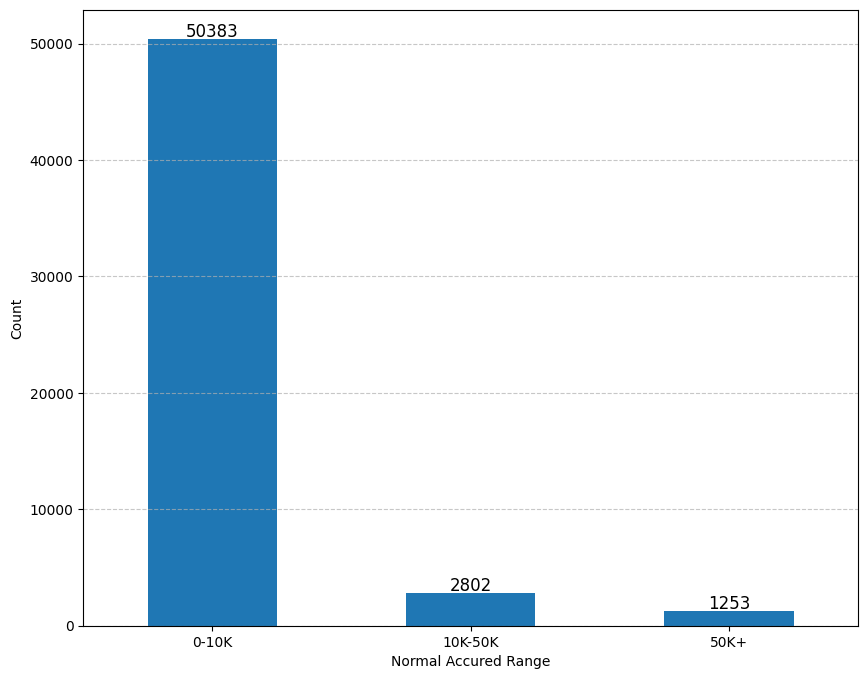

In [57]:
#plot for normal accured bin
plt.figure(figsize=(10,8))
ax = numerical_columns['NORMALACCRUED_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Normal Accured Range')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [58]:
#prinoverdue bins
bins = [0, 50e3, 100e3, 200e3, 500e3, float('inf')]
labels = ['0-50K', '50K-100K', '100K-200K', '200K-500K', '500K + ']

numerical_columns['PRINOVERDUE_bin'] = pd.cut(numerical_columns['PRINOVERDUE'], bins = bins, labels = labels, include_lowest=True)

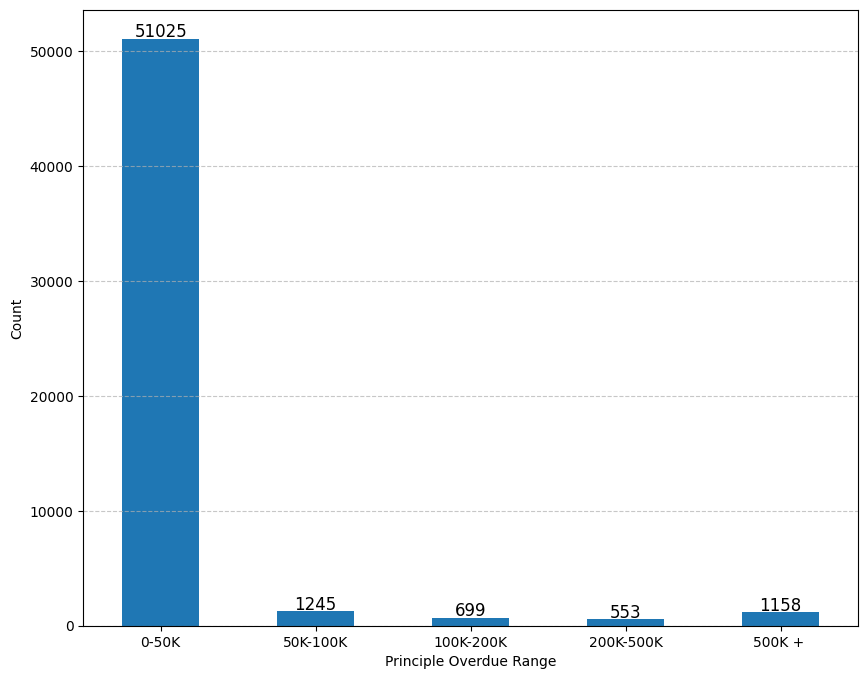

In [59]:
#plot for normal accured bin
plt.figure(figsize=(10,8))
ax = numerical_columns['PRINOVERDUE_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Principle Overdue Range')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [60]:
#principle overdue days bin

bins = [0, 250, 500, float('inf')]  
labels = ['0 - 250', '250 - 500', '500 +']

numerical_columns['PRINODDAYS_bin'] = pd.cut(numerical_columns['PRINODDAYS'], bins = bins, labels = labels, include_lowest=True)


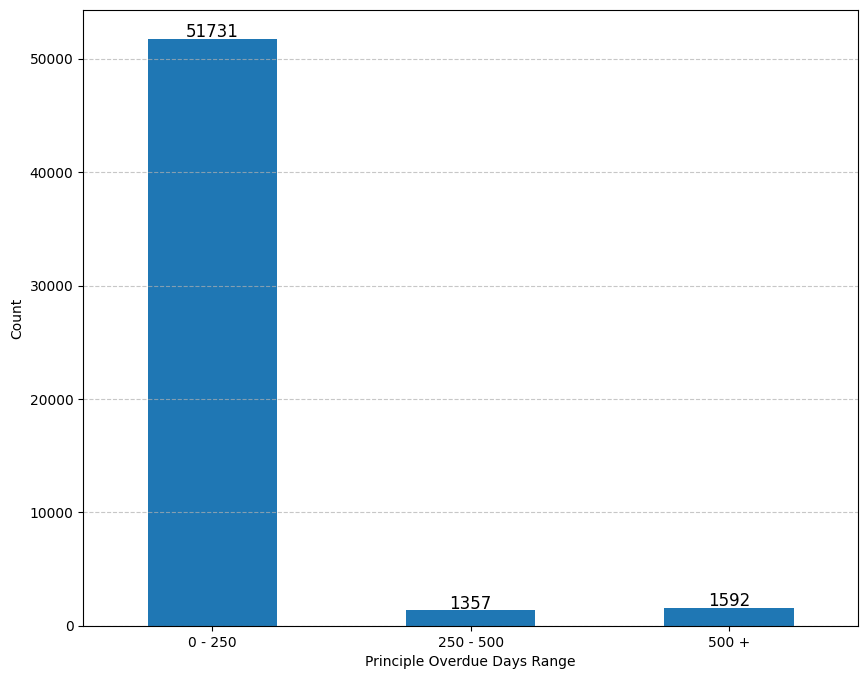

In [61]:
#plot for principle overdue days bin
plt.figure(figsize=(10,8))
ax = numerical_columns['PRINODDAYS_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Principle Overdue Days Range')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [62]:
#interest overdue bin
bins = [0, 1e4, 2e4, 3e4, 4e4, float('inf')]  
labels = ['0-10K', '10K-20K', '20K-30K', '30K-40K', '40K +']

numerical_columns['INTERESTOVERDUE_bin'] = pd.cut(numerical_columns['INTERESTOVERDUE'], bins = bins, labels = labels, include_lowest=True)

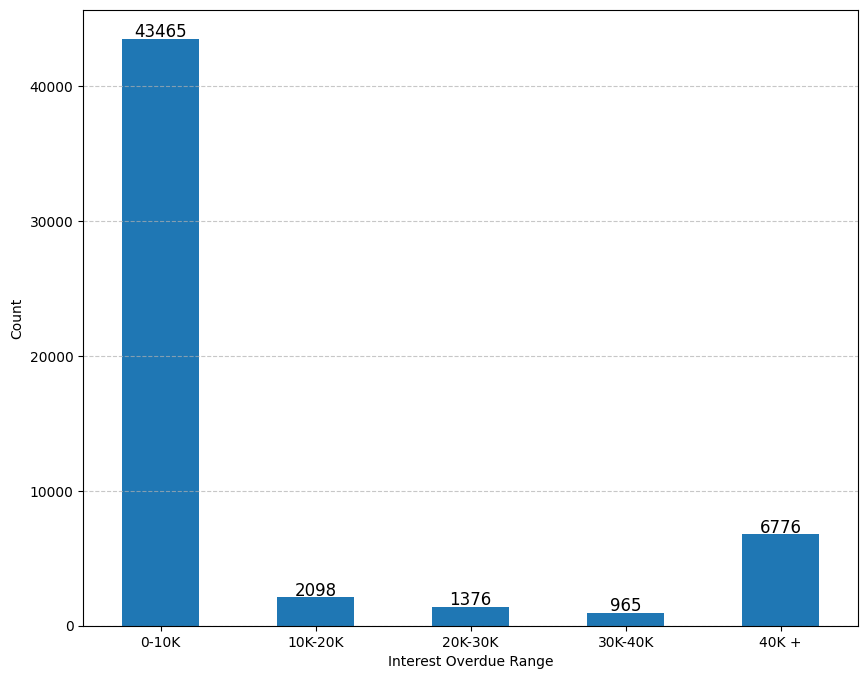

In [63]:
#plot for interest overdue bin
plt.figure(figsize=(10,8))
ax = numerical_columns['INTERESTOVERDUE_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Interest Overdue Range')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [64]:
#interest overdue days bin
bins = [0, 250, 500, float('inf')]  
labels = ['0 - 250', '250 - 500', '500 +']

numerical_columns['INTOVDDAYS_bin'] = pd.cut(numerical_columns['INTOVDDAYS'], bins = bins, labels = labels, include_lowest=True)

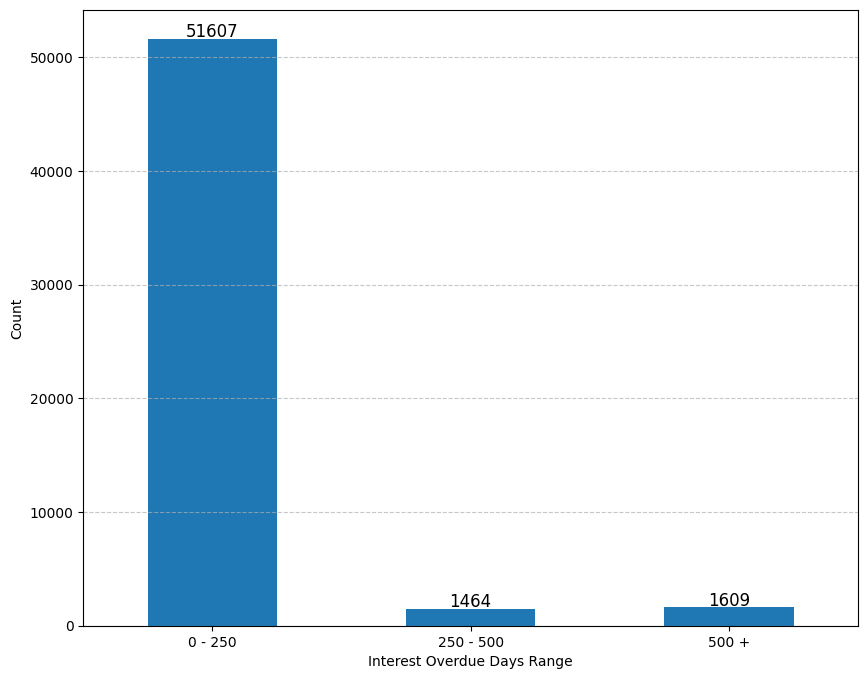

In [65]:
#plot for interest overdue days bin
plt.figure(figsize=(10,8))
ax = numerical_columns['INTOVDDAYS_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Interest Overdue Days Range')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
#penalty interest on interest bin
bins = [0, 5e3, 10e3, float('inf')]
labels = ['0-5K', '5K-10K', '10K+']

numerical_columns['PENAL_INT_ON_INT_bin'] = pd.cut(numerical_columns['PENAL_INT_ON_INT'], bins = bins, labels = labels, include_lowest=True)


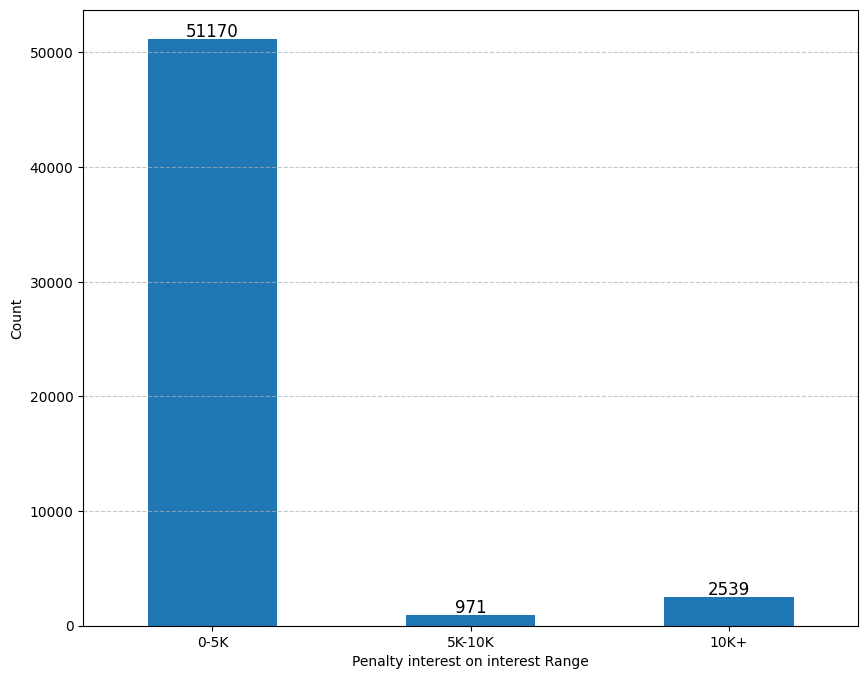

In [67]:
#plot for penalty interest on interest bin
plt.figure(figsize=(10,8))
ax = numerical_columns['PENAL_INT_ON_INT_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Penalty interest on interest Range')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
#Total LLP bin
bins = [0, 10e3, 50e3, float('inf')]
labels = ['0-10K', '10K-50K', '50K+']

numerical_columns['Total_LLP_bin'] = pd.cut(numerical_columns['Total LLP'], bins = bins, labels = labels, include_lowest=True)

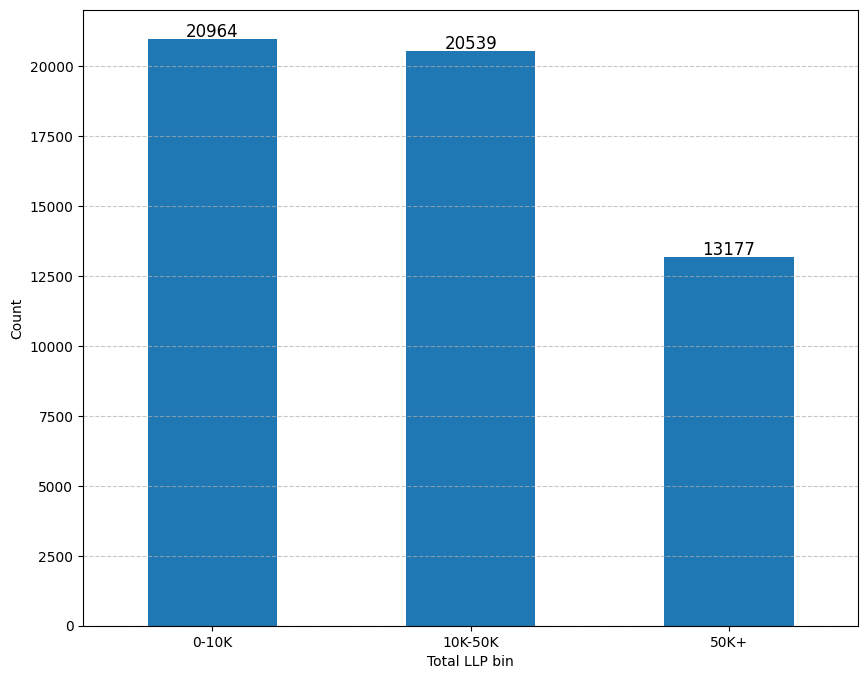

In [69]:
#plot for total LLP bin
plt.figure(figsize=(10,8))
ax = numerical_columns['Total_LLP_bin'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Total LLP bin')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [70]:
numerical_bin = numerical_columns[['INTRATE_bin','LCY_OUTSTANDING_bin','LIMIT_bin', 'NORMALACCRUED_bin','PRINOVERDUE_bin','PRINODDAYS_bin','INTERESTOVERDUE_bin','INTOVDDAYS_bin',
                                            'PENAL_INT_ON_INT_bin','Total_LLP_bin']]

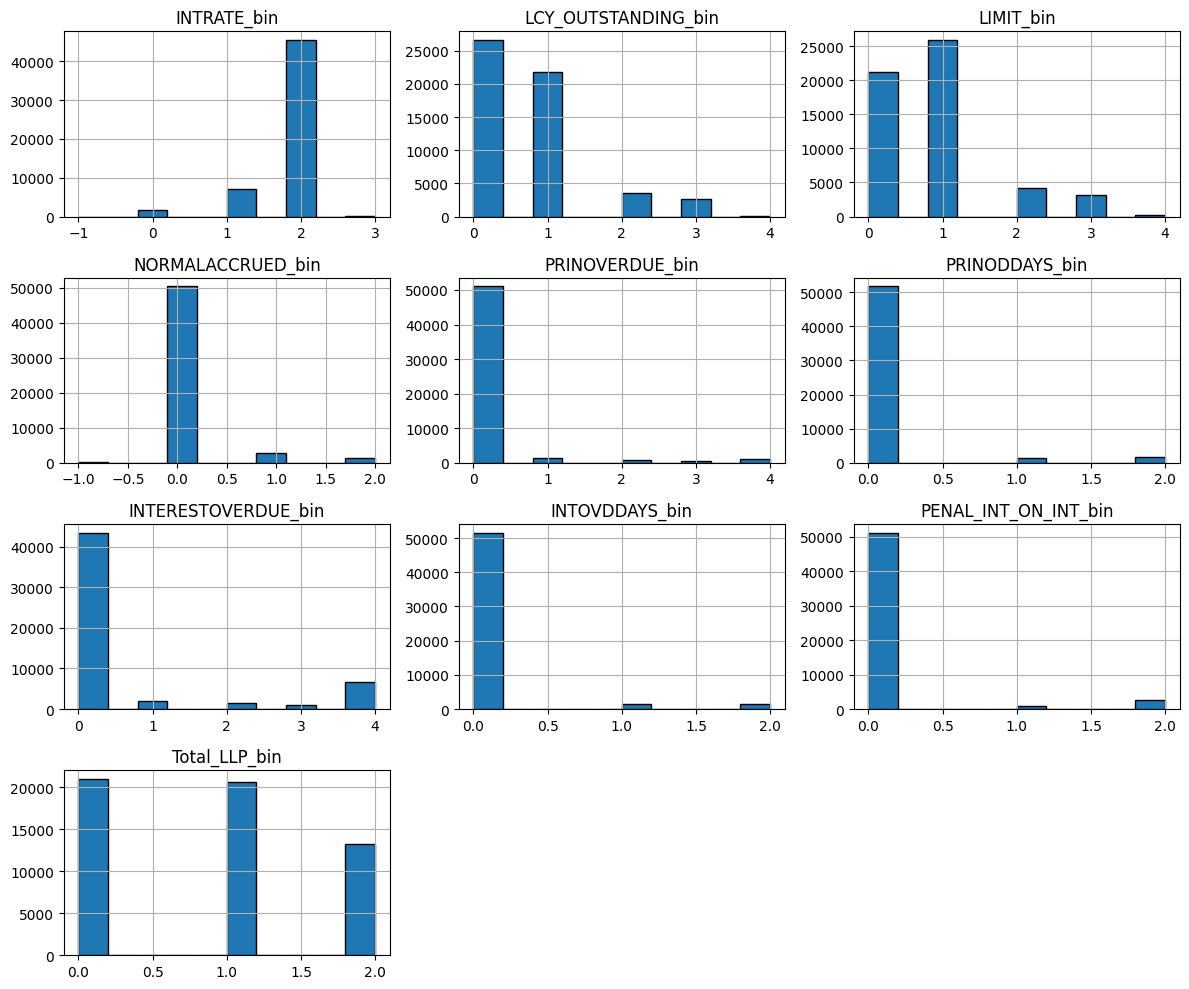

In [71]:
#numerical bin encoded
numerical_bin_encoded = numerical_bin.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)

# Plot histograms for all columns in 'numerical_bin_encoded'
numerical_bin_encoded.hist(bins=10, figsize=(12, 10), edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()


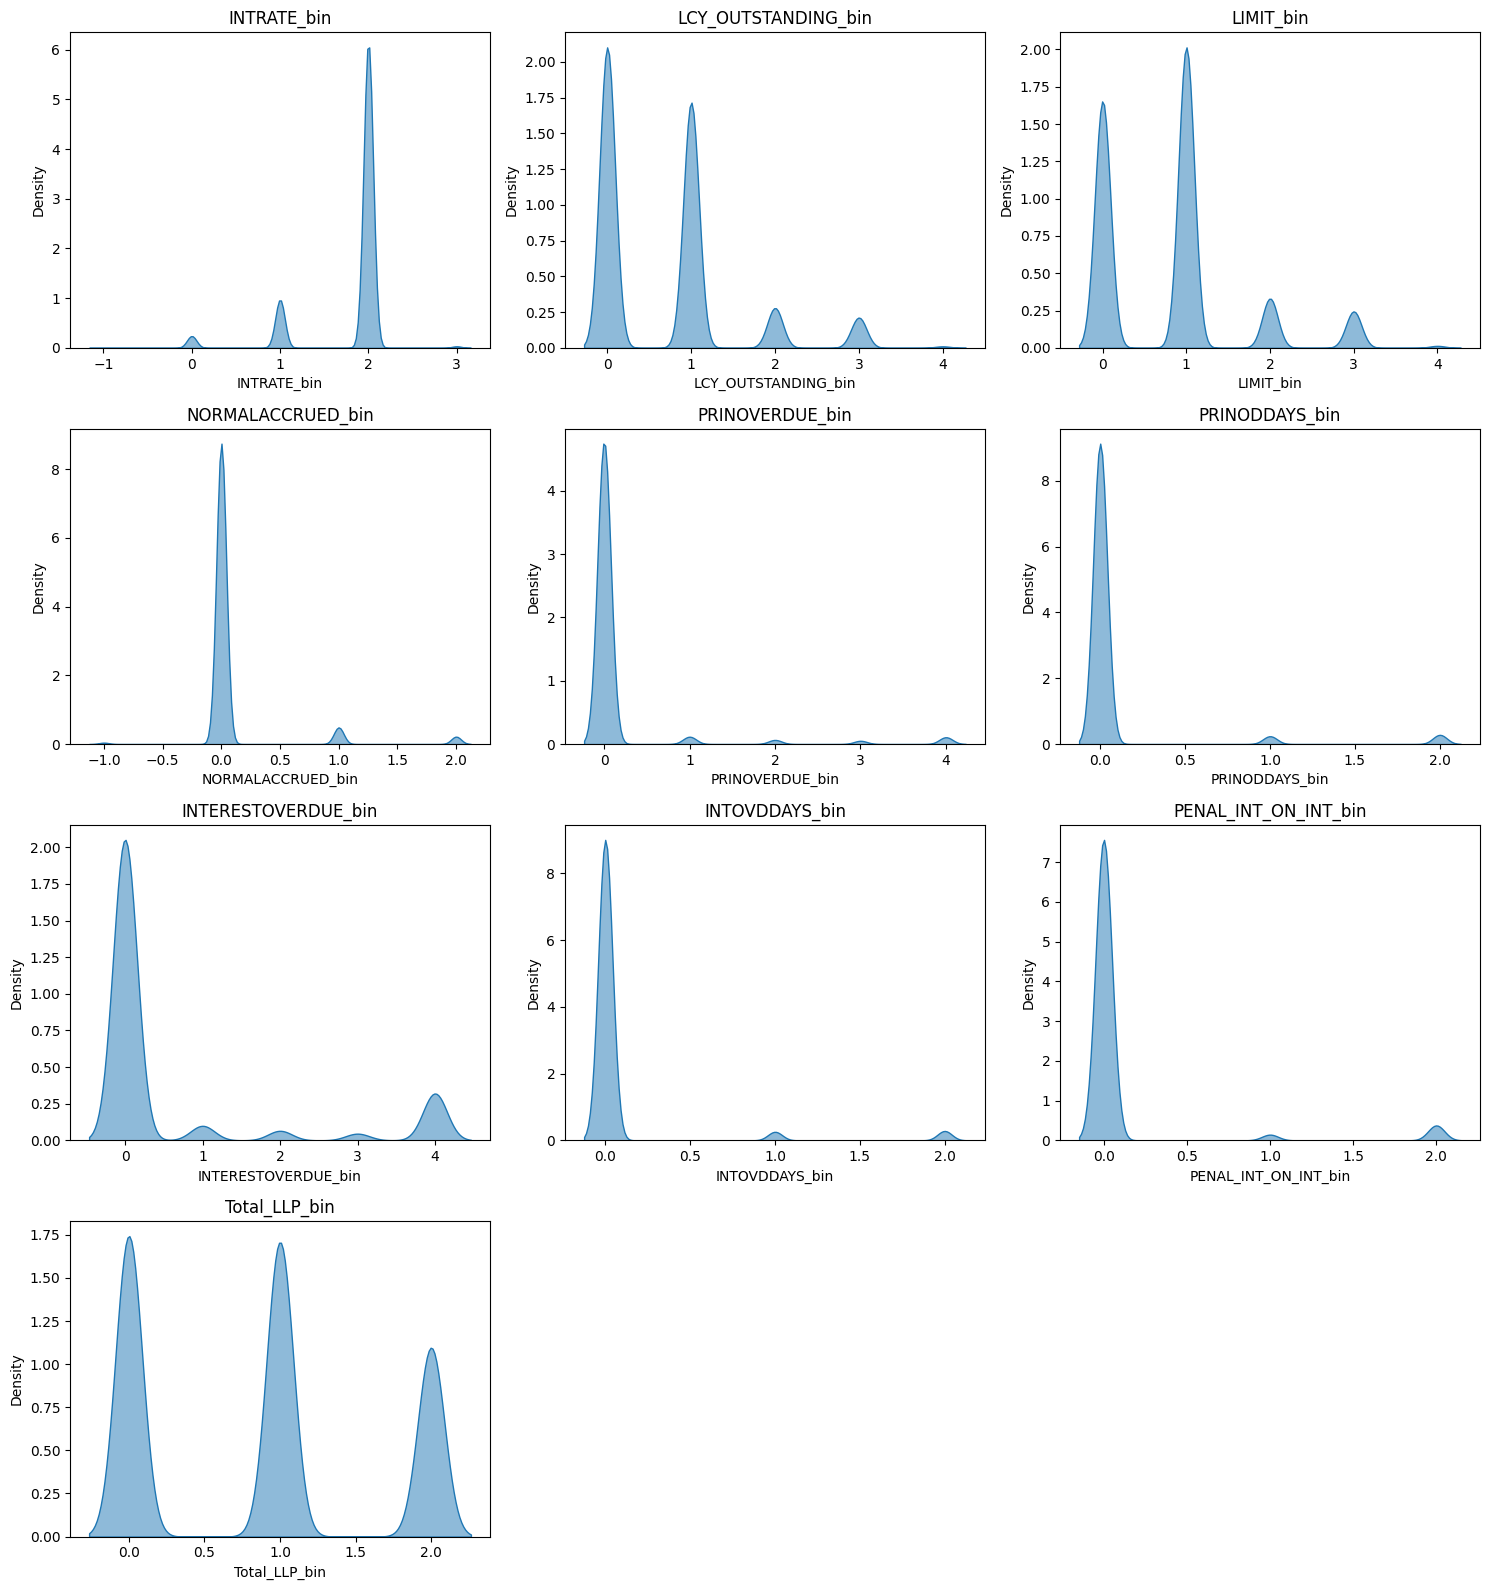

In [72]:
#Kernel Density Estimation
num_columns = numerical_bin_encoded.shape[1]
rows = (num_columns + 2) // 3  # Adjust number of rows based on columns
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))  # 3 plots per row

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each column to create KDE
for i, column in enumerate(numerical_bin_encoded.columns):
    sns.kdeplot(data=numerical_bin_encoded[column], ax=axes[i], fill=True, alpha=0.5)
    axes[i].set_title(column)

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

### E. Categorical columns Analysis

In [73]:
categorical_columns = data.select_dtypes(include=['object', 'category'])
categorical_columns

,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,PRIN_OVERDUE_DATE,INTEREST_OVERDUE_DATE,CLASSIFICATION,Final Classification,LLP%
0,HO,NPR,C00000727,ODA,AWC02,OVERDRAFT CORPORATE,OVERDRAFT,CB,0,0,1.0Pass,Pass,1.3%
1,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,0,0,1.0Pass,Pass,1.3%
2,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,0,0,1.0Pass,Pass,1.3%
3,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,0,0,1.0Pass,Pass,1.3%
4,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,0,0,1.0Pass,Pass,1.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54675,NPST7,NPR,R02063143,LAA,CHF11,HOUSING LOAN RETAIL (FIXED RATE),WORKING CAPITAL LOAN,RE,0,0,1.0Pass,Pass,1.3%
54676,NPST7,NPR,R02066979,LAA,CED11,EDUCATION LOAN RETAIL,EDUCATION LOAN,RE,0,0,1.0Pass,Pass,1.3%
54677,NPST7,NPR,R02067007,LAA,CHF11,HOUSING LOAN RETAIL (FIXED RATE),WORKING CAPITAL LOAN,RE,0,0,1.0Pass,Pass,1.3%
54678,NPST7,NPR,R02071843,LAA,CHF11,HOUSING LOAN RETAIL (FIXED RATE),WORKING CAPITAL LOAN,RE,0,0,1.0Pass,Pass,1.3%


In [74]:
categorical_columns.columns

Index(['STATE', 'CYDESC', 'CLIENTCODE', 'SCHM_TYPE', 'ACTYPE', 'ACTYPEDESC',
       'LOAN_TYPE', 'SEGMENT', 'PRIN_OVERDUE_DATE', 'INTEREST_OVERDUE_DATE',
       'CLASSIFICATION', 'Final Classification', 'LLP%'],
      dtype='object')

In [75]:
categorical_columns.describe()

,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,PRIN_OVERDUE_DATE,INTEREST_OVERDUE_DATE,CLASSIFICATION,Final Classification,LLP%
count,54680,54680,54680,54680,54680,54680,54680,54680,54680,54680,54680,54680,54680
unique,8,3,35732,2,318,318,24,14,1160,1141,7,6,6
top,NPST3,NPR,C01164333,LAA,CPE11,PERSONAL TERM LOAN RETAIL,OVERDRAFT,RE,0,0,1.0Pass,Pass,1.3%
freq,17313,54580,75,43369,4241,4241,12714,21993,41469,35249,40615,45014,45014


In [76]:
categorical_columns = categorical_columns.drop(['CLIENTCODE', 'ACTYPE', 'ACTYPEDESC', 'PRIN_OVERDUE_DATE', 'INTEREST_OVERDUE_DATE'], axis=1)


In [77]:
categorical_columns.columns

Index(['STATE', 'CYDESC', 'SCHM_TYPE', 'LOAN_TYPE', 'SEGMENT',
       'CLASSIFICATION', 'Final Classification', 'LLP%'],
      dtype='object')

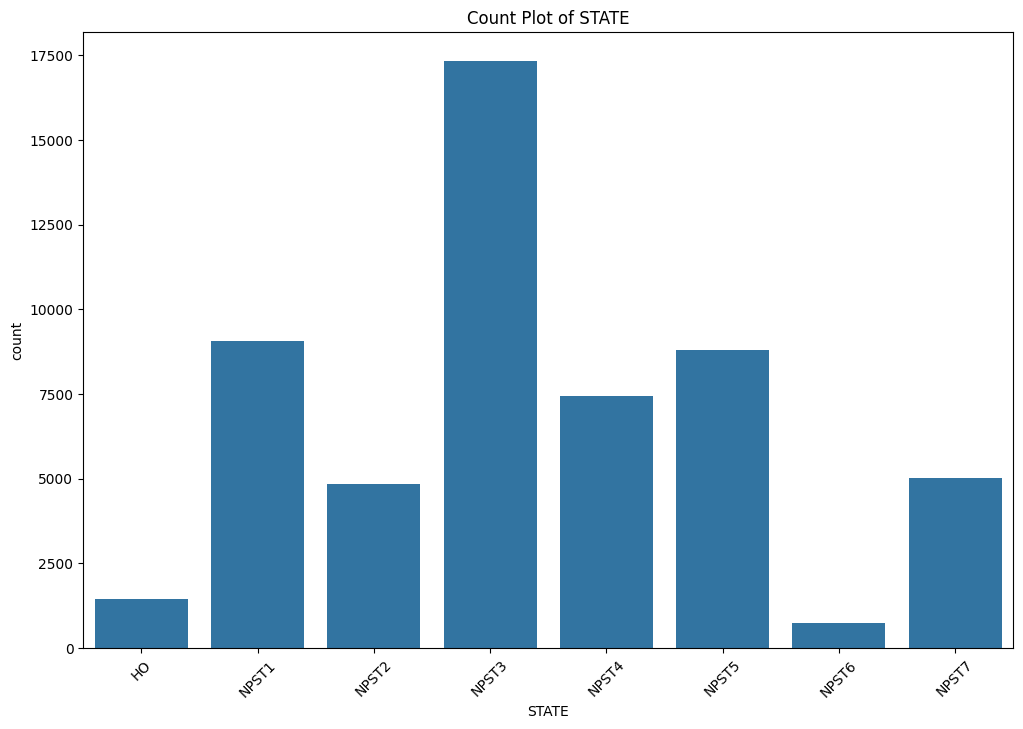

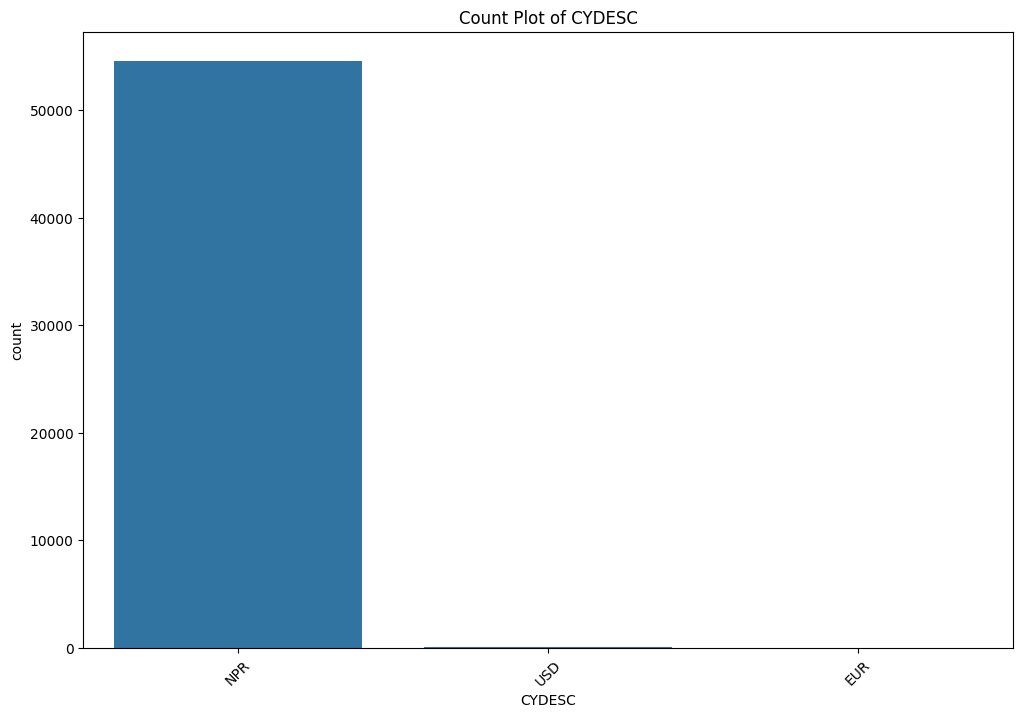

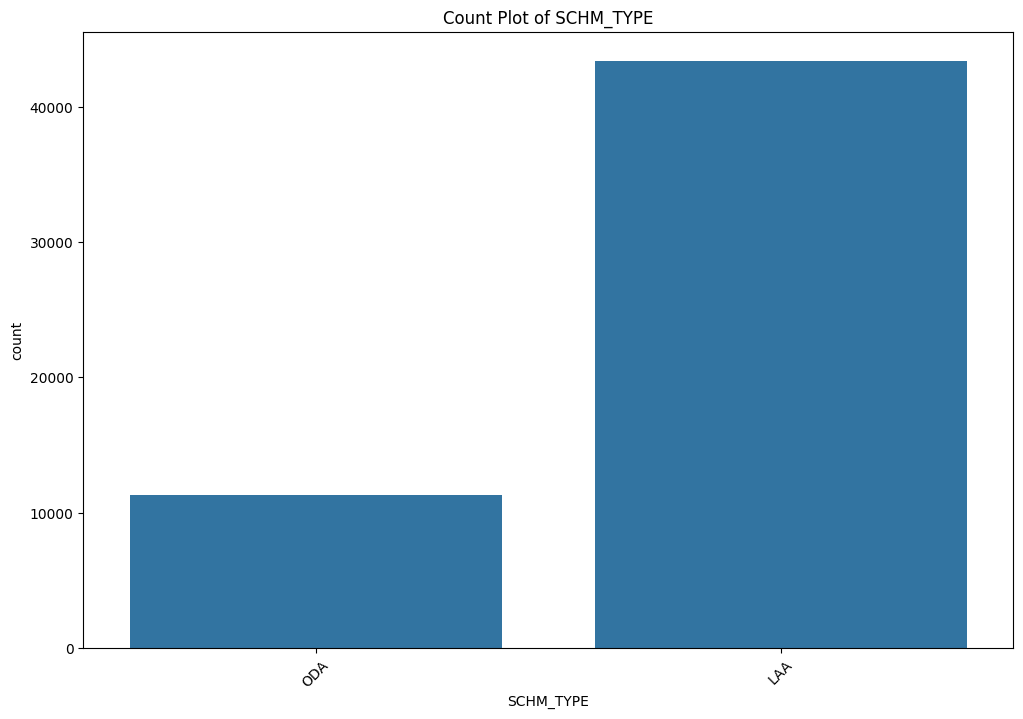

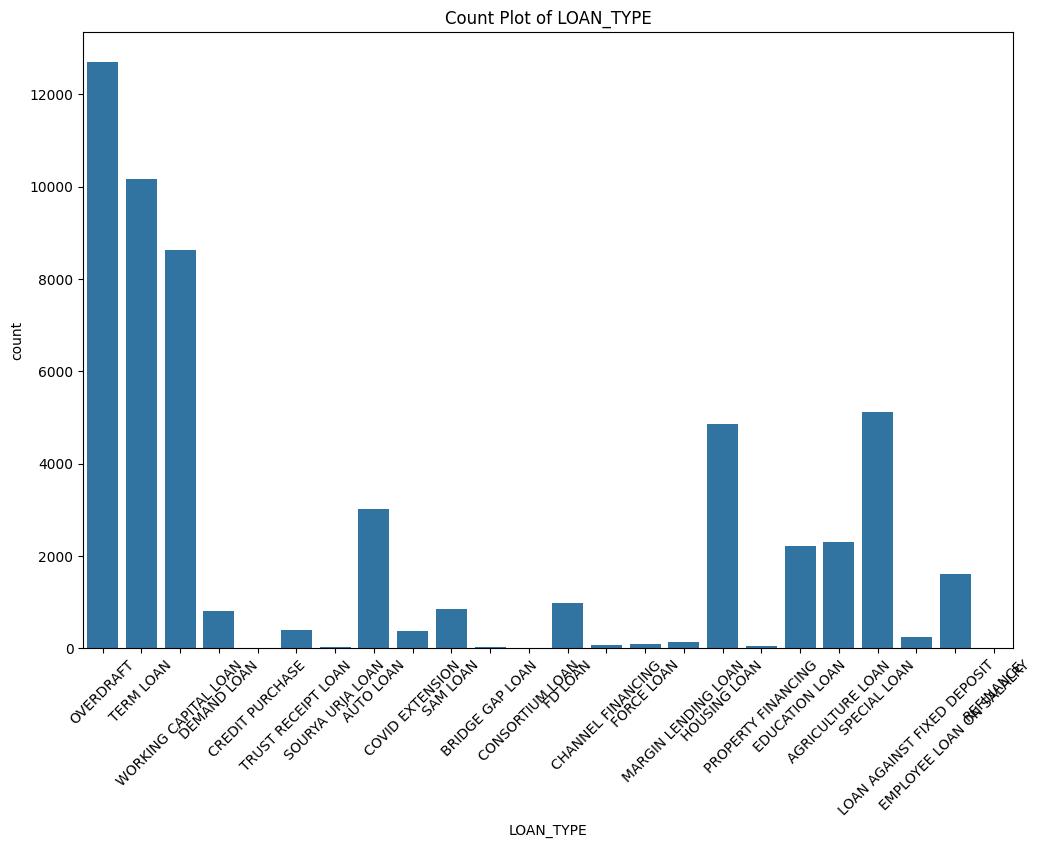

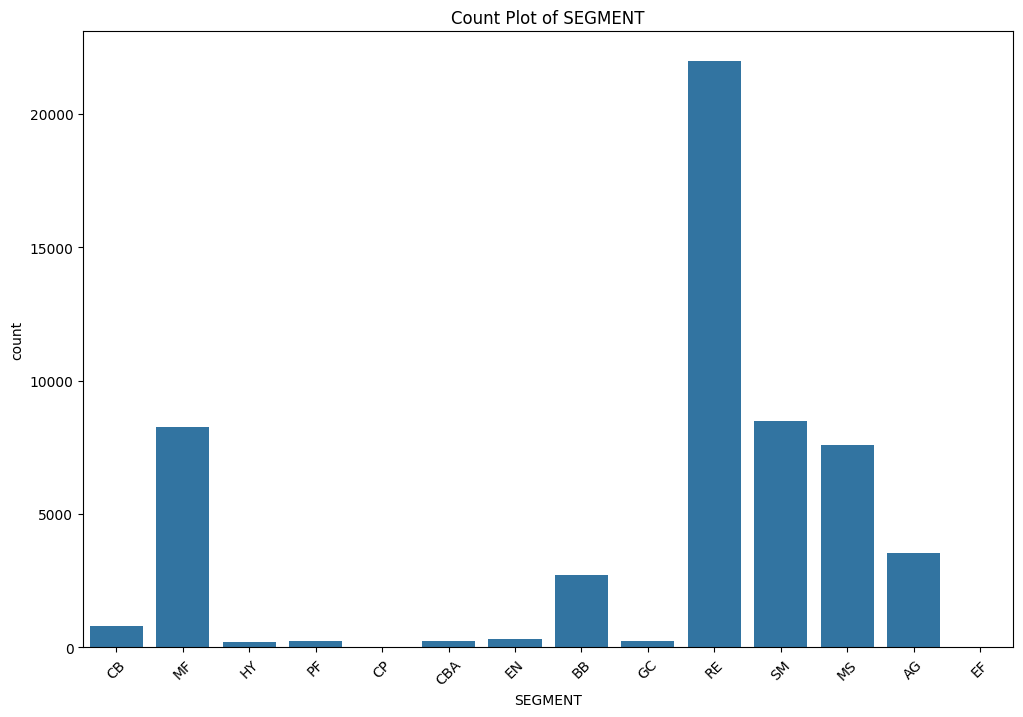

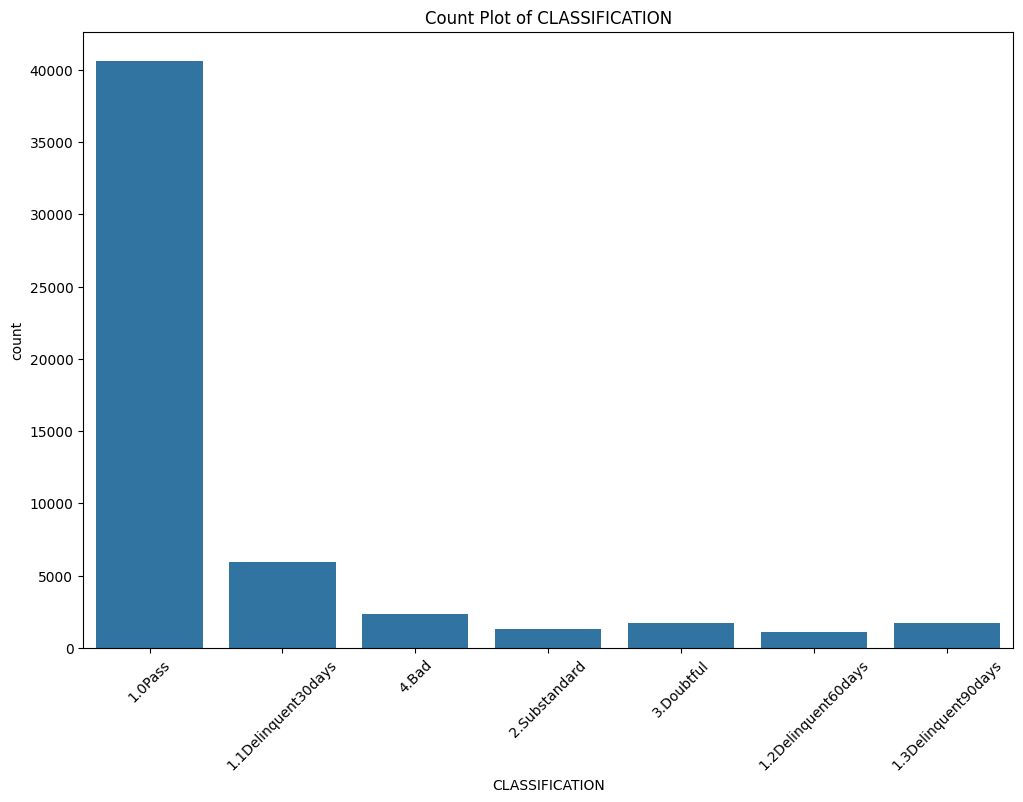

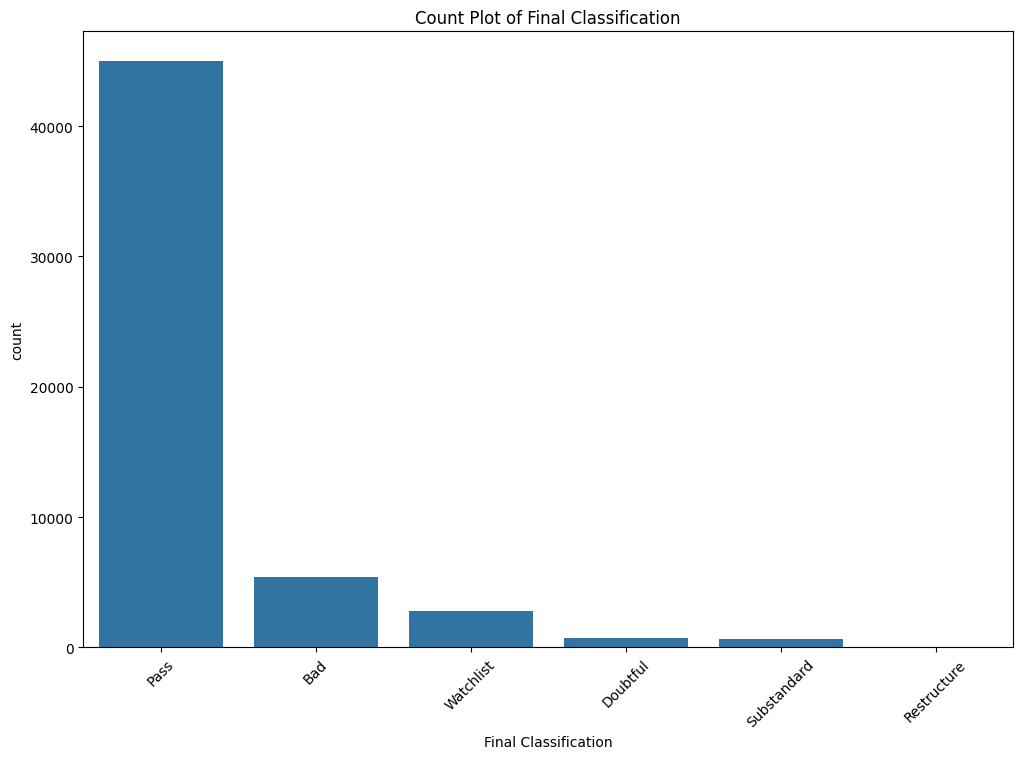

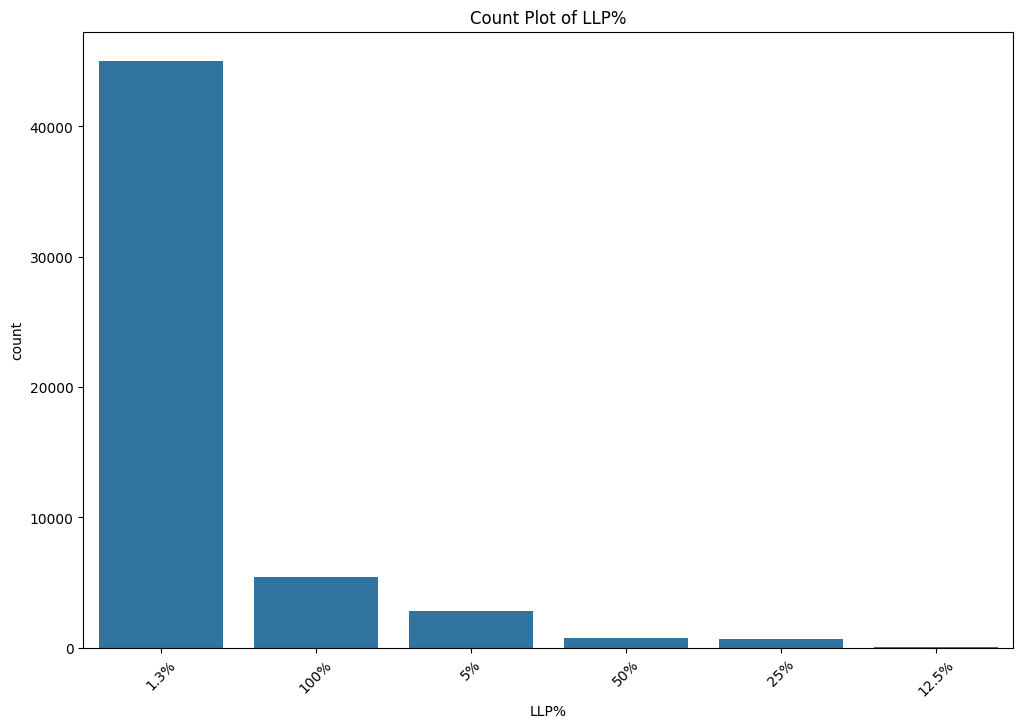

In [78]:
for col in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

### F. Outliers Identification

In [79]:
# Calculate IQR and identify outliers for 'INTRATE' column
Q1 = data['INTRATE'].quantile(0.25)
Q3 = data['INTRATE'].quantile(0.75)
IQR = Q3 - Q1
outliers_INTRATE = data[(data['INTRATE'] < (Q1 - 1.5 * IQR)) | (data['INTRATE'] > (Q3 + 1.5 * IQR))]

# Calculate IQR and identify outliers for 'OUTSTANDING' column
Q1 = data['OUTSTANDING'].quantile(0.25)
Q3 = data['OUTSTANDING'].quantile(0.75)
IQR = Q3 - Q1
outliers_OUTSTANDING = data[(data['OUTSTANDING'] < (Q1 - 1.5 * IQR)) | (data['OUTSTANDING'] > (Q3 + 1.5 * IQR))]

# Calculate IQR and identify outliers for 'LCY_OUTSTANDING' column
Q1 = data['LCY_OUTSTANDING'].quantile(0.25)
Q3 = data['LCY_OUTSTANDING'].quantile(0.75)
IQR = Q3 - Q1
outliers_LCYOutstanding = data[(data['LCY_OUTSTANDING'] < (Q1 - 1.5 * IQR)) | (data['LCY_OUTSTANDING'] > (Q3 + 1.5 * IQR))]

# Calculate IQR and identify outliers for 'LIMIT' column
Q1 = data['LIMIT'].quantile(0.25)
Q3_intrate = data['LIMIT'].quantile(0.75)
IQR = Q3 - Q1
outliers_LIMIT = data[(data['LIMIT'] < (Q1 - 1.5 * IQR)) | (data['LIMIT'] > (Q3 + 1.5 * IQR))]

# Calculate IQR and identify outliers for 'NORMALACCRUED' column
Q1 = data['NORMALACCRUED'].quantile(0.25)
Q3 = data['NORMALACCRUED'].quantile(0.75)
IQR = Q3 - Q1
outliers_NORMALACCRUED = data[(data['NORMALACCRUED'] < (Q1 - 1.5 * IQR)) | (data['NORMALACCRUED'] > (Q3 + 1.5 * IQR))]

# Calculate IQR and identify outliers for 'INTERESTOVERDUE' column
Q1 = data['INTERESTOVERDUE'].quantile(0.25)
Q3 = data['INTERESTOVERDUE'].quantile(0.75)
IQR = Q3 - Q1
outliers_INTERESTOVERDUE = data[(data['INTERESTOVERDUE'] < (Q1 - 1.5 * IQR)) | (data['INTERESTOVERDUE'] > (Q3 + 1.5 * IQR))]

# Calculate IQR and identify outliers for 'LLP Amount' column
Q1 = data['LLP Amount'].quantile(0.25)
Q3 = data['LLP Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers_LLPAmount = data[(data['LLP Amount'] < (Q1 - 1.5 * IQR)) | (data['LLP Amount'] > (Q3 + 1.5 * IQR))]

# Calculate IQR and identify outliers for 'Total LLP' column
Q1 = data['Total LLP'].quantile(0.25)
Q3 = data['Total LLP'].quantile(0.75)
IQR = Q3 - Q1
outliers_TotalLLP = data[(data['Total LLP'] < (Q1 - 1.5 * IQR)) | (data['Total LLP'] > (Q3 + 1.5 * IQR))]

print(f"Outliers in 'INTRATE':{outliers_INTRATE}")
print(f"Outliers in 'OUTSTANDING': {outliers_OUTSTANDING}")
print(f"Outliers in 'LCY_OUTSTANDING': {outliers_LCYOutstanding}")
print(f"Outliers in 'LIMIT':{outliers_LIMIT}")
print(f"Outliers in 'NORMALACCRUED': {outliers_NORMALACCRUED}")
print(f"Outliers in 'INTERESTOVERDUE':{outliers_INTERESTOVERDUE}")
print(f"Outliers in 'LLP Amount':{outliers_LLPAmount}")
print(f"Outliers in 'Total LLP':{outliers_TotalLLP}")


Outliers in 'INTRATE':       BRANCHCODE  STATE CYDESC CLIENTCODE SCHM_TYPE ACTYPE  \
35          990.0     HO    USD  C00011609       LAA  DTU02   
48          990.0     HO    NPR  C00022494       LAA  BWC09   
50          990.0     HO    NPR  C00028566       LAA  CSU05   
69          990.0     HO    NPR  C00067458       LAA  COI04   
71          990.0     HO    NPR  C00067458       LAA  COI04   
...           ...    ...    ...        ...       ...    ...   
54585       192.0  NPST7    NPR  C01439563       LAA  CSL03   
54586       192.0  NPST7    NPR  C01439595       LAA  CSL03   
54589       192.0  NPST7    NPR  C01445131       LAA  CSL10   
54590       192.0  NPST7    NPR  C01446576       LAA  CSL03   
54594       192.0  NPST7    NPR  C01450164       LAA  CSL03   

                                      ACTYPEDESC             LOAN_TYPE  \
35                   TRUST RECEIPT USD CORPORATE    TRUST RECEIPT LOAN   
48            WORKING CAPITAL LOAN MICRO FINANCE  WORKING CAPITAL LOAN   

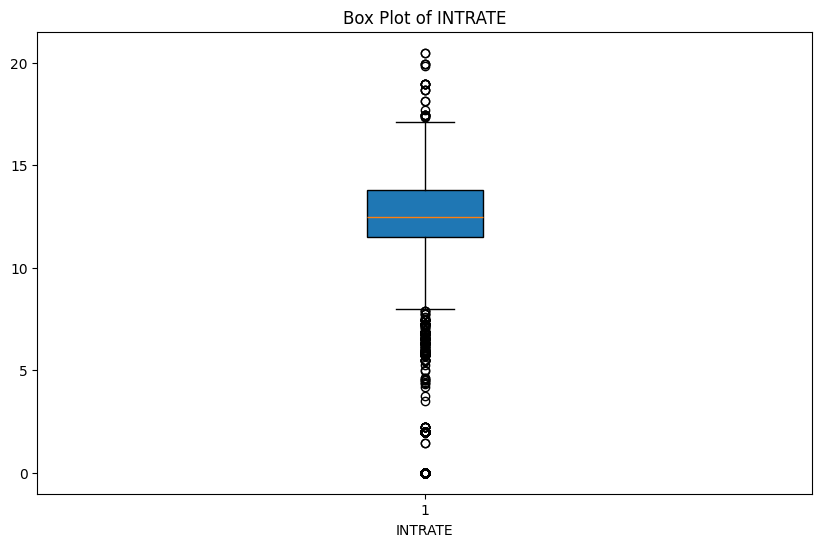

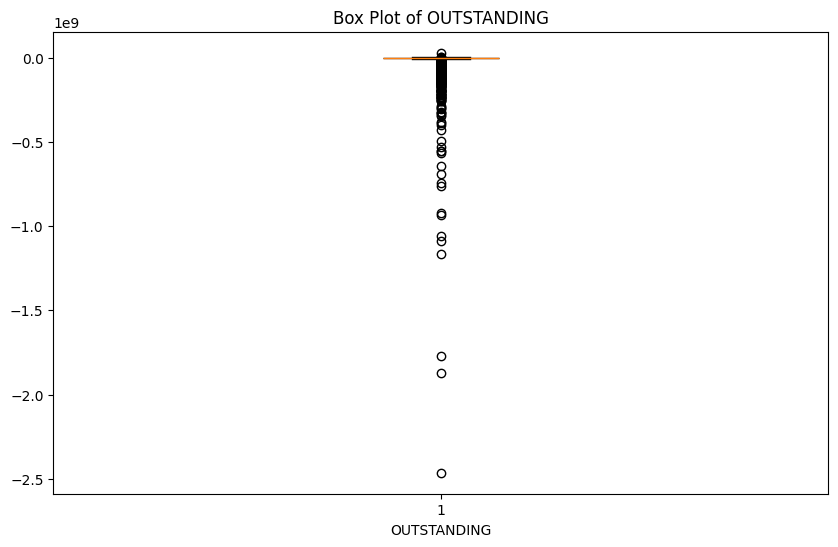

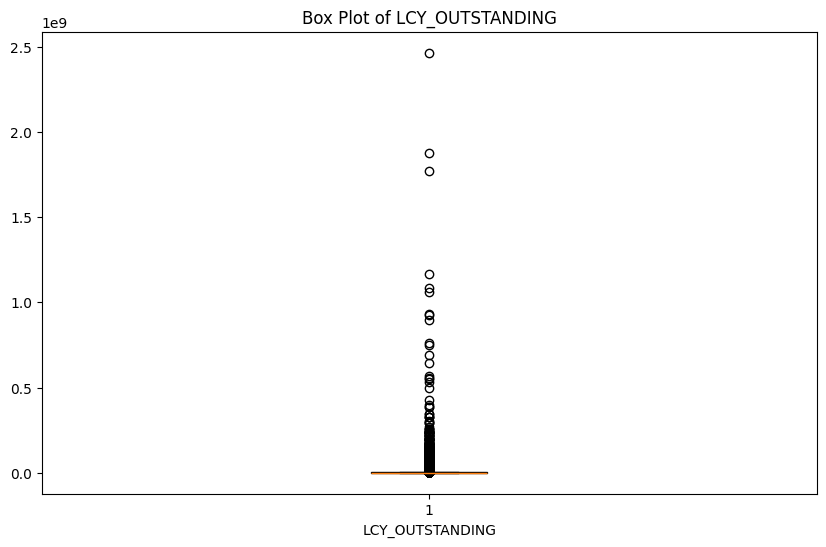

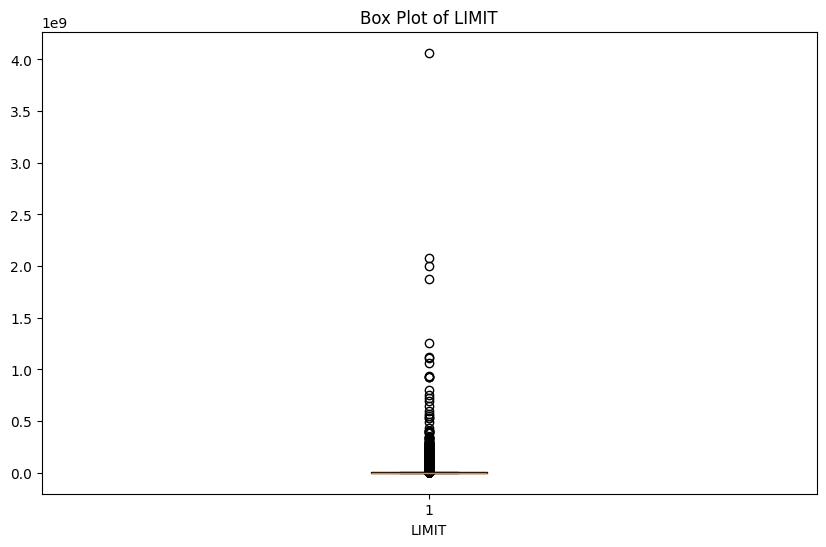

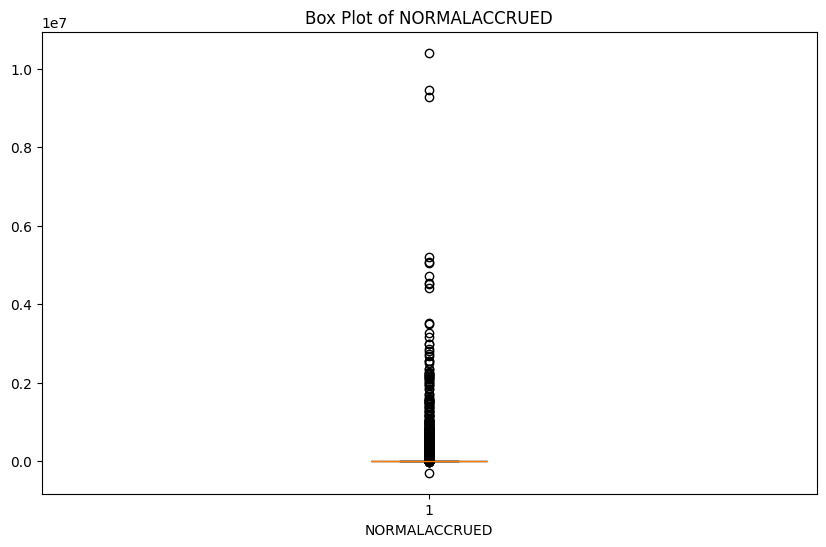

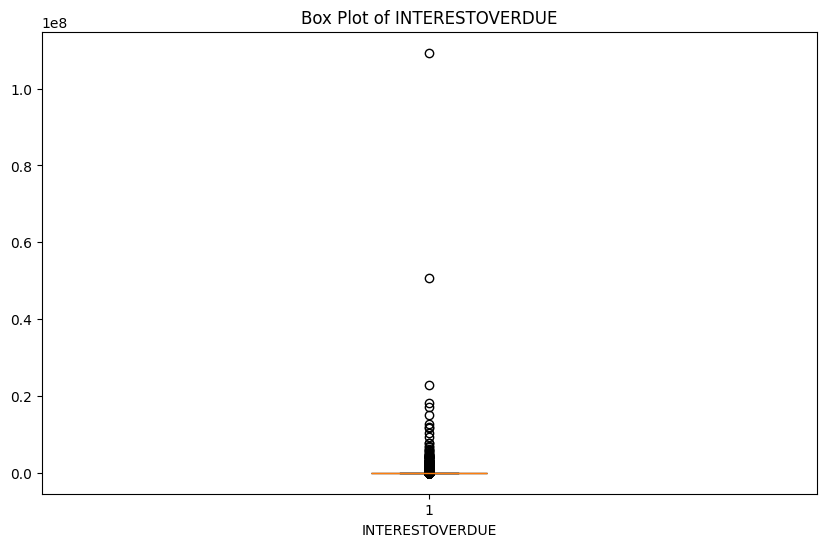

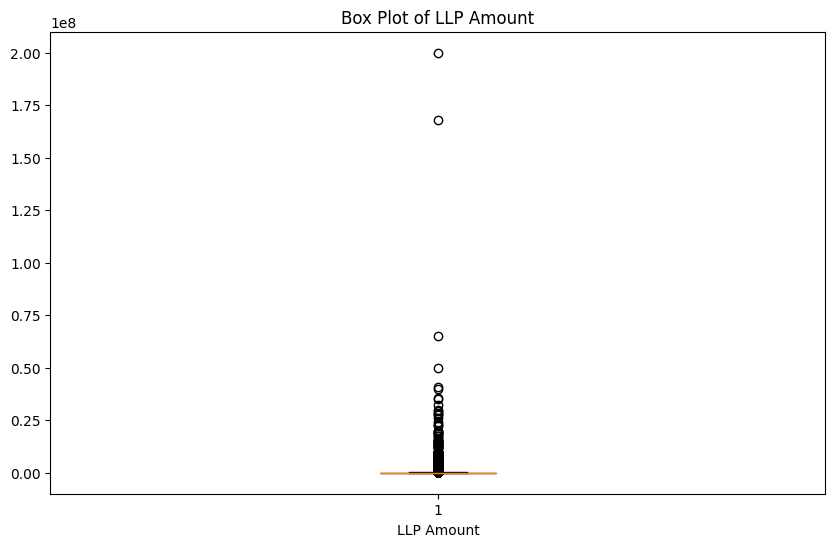

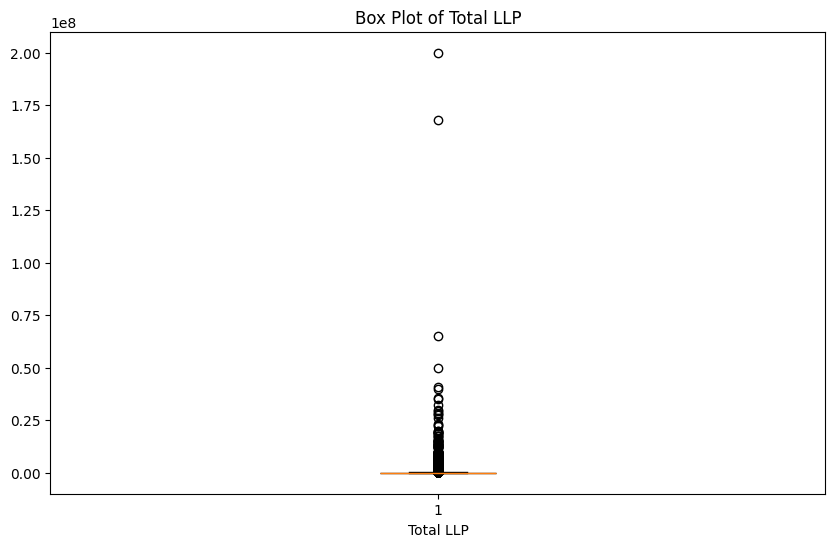

In [80]:
# Box plot for 'INTRATE'
plt.figure(figsize=(10, 6))
plt.boxplot(data['INTRATE'].dropna(), patch_artist=True)
plt.title('Box Plot of INTRATE')
plt.xlabel('INTRATE')

# Box plot for 'OUTSTANDING'
plt.figure(figsize=(10, 6))
plt.boxplot(data['OUTSTANDING'].dropna(), patch_artist=True)
plt.title('Box Plot of OUTSTANDING')
plt.xlabel('OUTSTANDING')

# Box plot for 'LCY_OUTSTANDING'
plt.figure(figsize=(10, 6))
plt.boxplot(data['LCY_OUTSTANDING'].dropna(), patch_artist=True)
plt.title('Box Plot of LCY_OUTSTANDING')
plt.xlabel('LCY_OUTSTANDING')

# Box plot for 'LIMIT'
plt.figure(figsize=(10, 6))
plt.boxplot(data['LIMIT'].dropna(), patch_artist=True)
plt.title('Box Plot of LIMIT')
plt.xlabel('LIMIT')

# Box plot for 'NORMALACCRUED'
plt.figure(figsize=(10, 6))
plt.boxplot(data['NORMALACCRUED'].dropna(), patch_artist=True)
plt.title('Box Plot of NORMALACCRUED')
plt.xlabel('NORMALACCRUED')

# Box plot for 'INTERESTOVERDUE'
plt.figure(figsize=(10, 6))
plt.boxplot(data['INTERESTOVERDUE'].dropna(), patch_artist=True)
plt.title('Box Plot of INTERESTOVERDUE')
plt.xlabel('INTERESTOVERDUE')

# Box plot for 'LLP Amount'
plt.figure(figsize=(10, 6))
plt.boxplot(data['LLP Amount'].dropna(), patch_artist=True)
plt.title('Box Plot of LLP Amount')
plt.xlabel('LLP Amount')

# Box plot for 'Total LLP'
plt.figure(figsize=(10, 6))
plt.boxplot(data['Total LLP'].dropna(), patch_artist=True)
plt.title('Box Plot of Total LLP')
plt.xlabel('Total LLP')

plt.show()

### G. Making multiclassification to binary classification problem

In [81]:
data['Final Classification'].unique()

array(['Pass', 'Bad', 'Watchlist', 'Doubtful', 'Substandard',
       'Restructure'], dtype=object)

In [82]:
data['Binary Classification'] = data['Final Classification'].apply(
    lambda x: 'Performing Loan' if x in ['Pass', 'Watchlist'] else 'Non-Performing Loan')

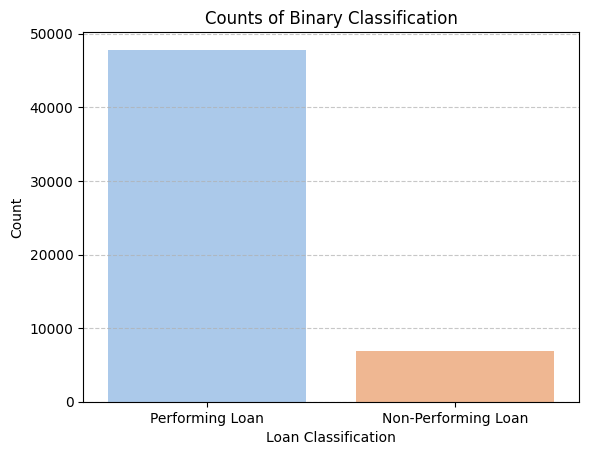

In [83]:
classification_counts = data['Binary Classification'].value_counts()

# Plot the bar chart using seaborn
sns.barplot(x=classification_counts.index, y=classification_counts.values, palette='pastel')
plt.title('Counts of Binary Classification')
plt.xlabel('Loan Classification')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### H. Feature Engineering

##### **1. Categorical Variables**

- **For SEGMENT**

<mark> Label encoding <mark>

In [84]:
data['SEGMENT'].unique()

array(['CB', 'MF', 'HY', 'PF', 'CP', 'CBA', 'EN', 'BB', 'GC', 'RE', 'SM',
       'MS', 'AG', 'EF'], dtype=object)

In [85]:
# Creating a mapping dictionary
segment_mapping = {val: idx for idx, val in enumerate(data['SEGMENT'].unique())}

# Applying the mapping
data['SEGMENT_NUM'] = data['SEGMENT'].map(segment_mapping)

data.head()

,BRANCHCODE,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,ACOPENDATE,...,PENAL_INT_ON_INT,CLASSIFICATION,Final Classification,LLP%,LLP Amount,DCGF & Hydro Moratorium,Additional LLP,Total LLP,Binary Classification,SEGMENT_NUM
0,990.0,HO,NPR,C00000727,ODA,AWC02,OVERDRAFT CORPORATE,OVERDRAFT,CB,2009-04-02,...,0.0,1.0Pass,Pass,1.3%,2.618083e+04,0,0,2.618083e+04,Performing Loan,0
1,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2023-02-07,...,0.0,1.0Pass,Pass,1.3%,5.010897e+05,0,0,5.010897e+05,Performing Loan,1
2,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-03-13,...,0.0,1.0Pass,Pass,1.3%,1.074284e+05,0,0,1.074284e+05,Performing Loan,1
3,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2021-04-01,...,0.0,1.0Pass,Pass,1.3%,1.288171e+06,0,0,1.288171e+06,Performing Loan,1
4,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-09-01,...,0.0,1.0Pass,Pass,1.3%,1.385334e+05,0,0,1.385334e+05,Performing Loan,1


In [86]:
# Convert Binary Classification to numeric
binary_mapping = {val: idx for idx, val in enumerate(data['Binary Classification'].unique())}
data['BINARY_NUM'] = data['Binary Classification'].map(binary_mapping)

In [87]:
# Calculating correlation
correlation = data[['SEGMENT_NUM', 'BINARY_NUM']].corr()
print(correlation)

             SEGMENT_NUM  BINARY_NUM
SEGMENT_NUM     1.000000   -0.176584
BINARY_NUM     -0.176584    1.000000


In [88]:
data

,BRANCHCODE,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,ACOPENDATE,...,CLASSIFICATION,Final Classification,LLP%,LLP Amount,DCGF & Hydro Moratorium,Additional LLP,Total LLP,Binary Classification,SEGMENT_NUM,BINARY_NUM
0,990.0,HO,NPR,C00000727,ODA,AWC02,OVERDRAFT CORPORATE,OVERDRAFT,CB,2009-04-02,...,1.0Pass,Pass,1.3%,2.618083e+04,0,0,2.618083e+04,Performing Loan,0,0
1,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2023-02-07,...,1.0Pass,Pass,1.3%,5.010897e+05,0,0,5.010897e+05,Performing Loan,1,0
2,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-03-13,...,1.0Pass,Pass,1.3%,1.074284e+05,0,0,1.074284e+05,Performing Loan,1,0
3,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2021-04-01,...,1.0Pass,Pass,1.3%,1.288171e+06,0,0,1.288171e+06,Performing Loan,1,0
4,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-09-01,...,1.0Pass,Pass,1.3%,1.385334e+05,0,0,1.385334e+05,Performing Loan,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54675,193.0,NPST7,NPR,R02063143,LAA,CHF11,HOUSING LOAN RETAIL (FIXED RATE),WORKING CAPITAL LOAN,RE,2023-04-04,...,1.0Pass,Pass,1.3%,2.067000e+04,0,0,2.067000e+04,Performing Loan,9,0
54676,193.0,NPST7,NPR,R02066979,LAA,CED11,EDUCATION LOAN RETAIL,EDUCATION LOAN,RE,2023-04-18,...,1.0Pass,Pass,1.3%,5.154493e+04,0,0,5.154493e+04,Performing Loan,9,0
54677,193.0,NPST7,NPR,R02067007,LAA,CHF11,HOUSING LOAN RETAIL (FIXED RATE),WORKING CAPITAL LOAN,RE,2023-04-30,...,1.0Pass,Pass,1.3%,6.478321e+04,0,0,6.478321e+04,Performing Loan,9,0
54678,193.0,NPST7,NPR,R02071843,LAA,CHF11,HOUSING LOAN RETAIL (FIXED RATE),WORKING CAPITAL LOAN,RE,2023-05-07,...,1.0Pass,Pass,1.3%,2.294561e+04,0,0,2.294561e+04,Performing Loan,9,0


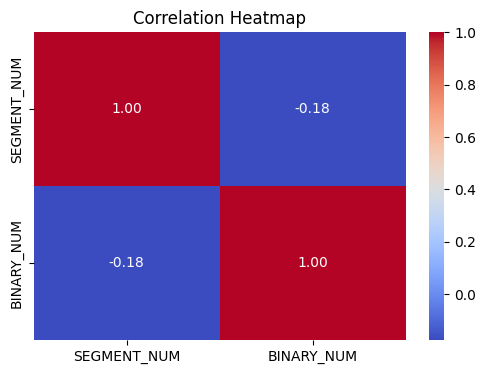

In [89]:
# Compute correlation
correlation_matrix = data[['SEGMENT_NUM', 'BINARY_NUM']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

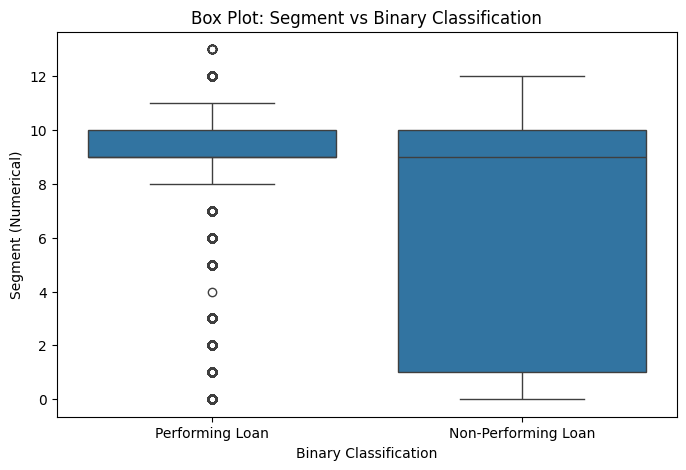

In [90]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Binary Classification'], y=data['SEGMENT_NUM'])
plt.xlabel("Binary Classification")
plt.ylabel("Segment (Numerical)")
plt.title("Box Plot: Segment vs Binary Classification")
plt.show()


Segment might have some impact on loan performance, but the large spread for Non-Performing Loans suggests that other factors could be influencing this classification.

The difference in medians suggests some distinction, but the overlapping distributions indicate that the segment alone is not a strong predictor.

<mark> one hot  encoding <mark>

In [91]:
# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['SEGMENT'], prefix='SEGMENT')

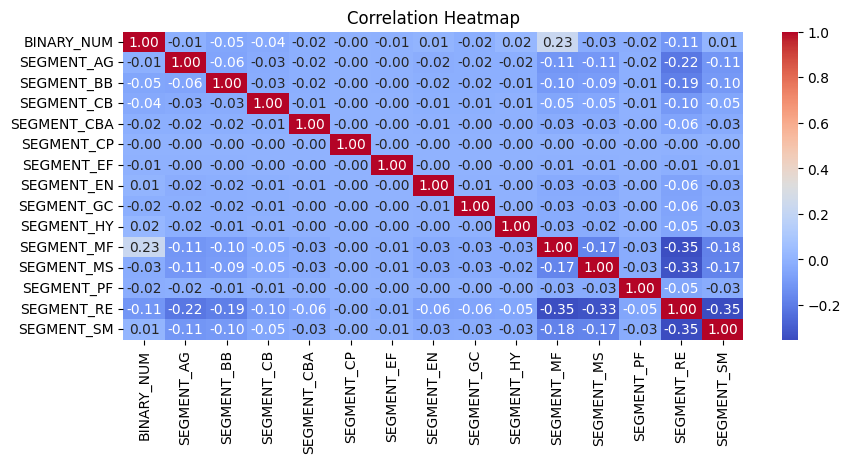

In [92]:
# Compute correlation
correlation_matrix = data_encoded[['BINARY_NUM', 'SEGMENT_AG',
       'SEGMENT_BB', 'SEGMENT_CB', 'SEGMENT_CBA', 'SEGMENT_CP', 'SEGMENT_EF',
       'SEGMENT_EN', 'SEGMENT_GC', 'SEGMENT_HY', 'SEGMENT_MF', 'SEGMENT_MS',
       'SEGMENT_PF', 'SEGMENT_RE', 'SEGMENT_SM']].corr()

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Segment alone does not strongly predict BINARY_NUM. The low correlations indicate that segmentation might not be a primary factor in classification.

There could be interactions between segments and other features (e.g., loan amount, interest rates, customer history) that impact classification.

- **For STATE**

In [93]:
data['STATE'].unique()

array(['HO', 'NPST1', 'NPST2', 'NPST3', 'NPST4', 'NPST5', 'NPST6',
       'NPST7'], dtype=object)

In [94]:
# Creating a mapping dictionary
segment_mapping = {val: idx for idx, val in enumerate(data['STATE'].unique())}

# Applying the mapping
data['STATE_NUM'] = data['STATE'].map(segment_mapping)

data.head()

,BRANCHCODE,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,ACOPENDATE,...,Final Classification,LLP%,LLP Amount,DCGF & Hydro Moratorium,Additional LLP,Total LLP,Binary Classification,SEGMENT_NUM,BINARY_NUM,STATE_NUM
0,990.0,HO,NPR,C00000727,ODA,AWC02,OVERDRAFT CORPORATE,OVERDRAFT,CB,2009-04-02,...,Pass,1.3%,2.618083e+04,0,0,2.618083e+04,Performing Loan,0,0,0
1,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2023-02-07,...,Pass,1.3%,5.010897e+05,0,0,5.010897e+05,Performing Loan,1,0,0
2,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-03-13,...,Pass,1.3%,1.074284e+05,0,0,1.074284e+05,Performing Loan,1,0,0
3,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2021-04-01,...,Pass,1.3%,1.288171e+06,0,0,1.288171e+06,Performing Loan,1,0,0
4,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-09-01,...,Pass,1.3%,1.385334e+05,0,0,1.385334e+05,Performing Loan,1,0,0


In [95]:
# Calculating correlation
correlation = data[['STATE_NUM', 'BINARY_NUM']].corr()
print(correlation)

            STATE_NUM  BINARY_NUM
STATE_NUM    1.000000    0.099154
BINARY_NUM   0.099154    1.000000


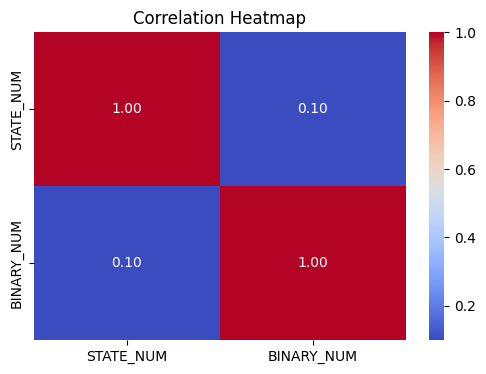

In [96]:
# Compute correlation
correlation_matrix = data[['STATE_NUM', 'BINARY_NUM']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

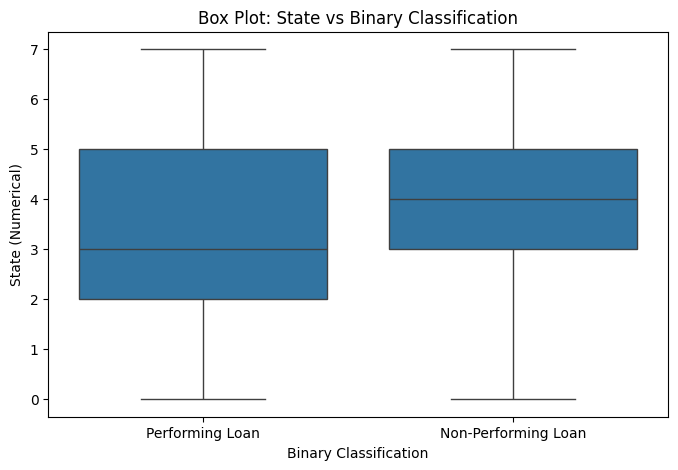

In [97]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Binary Classification'], y=data['STATE_NUM'])
plt.xlabel("Binary Classification")
plt.ylabel("State (Numerical)")
plt.title("Box Plot: State vs Binary Classification")
plt.show()

In [98]:
# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['STATE'], prefix='STATE')

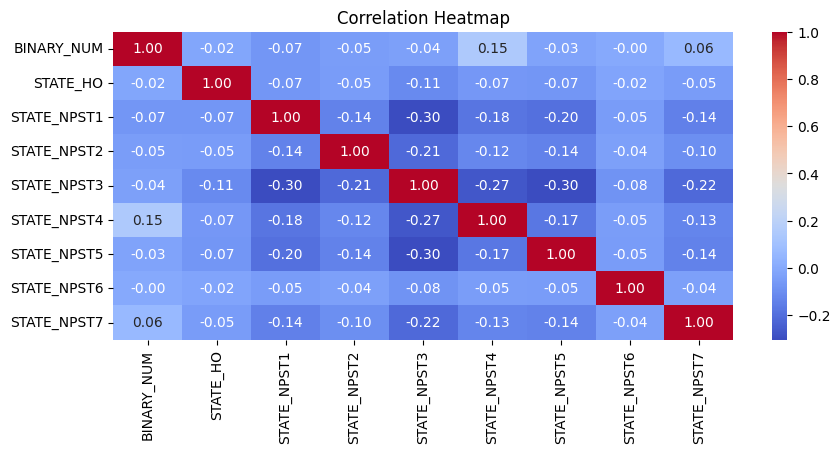

In [99]:
# Compute correlation
correlation_matrix = data_encoded[['BINARY_NUM', 'STATE_HO',
       'STATE_NPST1', 'STATE_NPST2', 'STATE_NPST3', 'STATE_NPST4', 'STATE_NPST5',
       'STATE_NPST6', 'STATE_NPST7']].corr()

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- **For CYDESC**

In [100]:
data['CYDESC'].unique()

array(['NPR', 'USD', 'EUR'], dtype=object)

In [101]:
# Creating a mapping dictionary
segment_mapping = {val: idx for idx, val in enumerate(data['CYDESC'].unique())}

# Applying the mapping
data['CYDESC_NUM'] = data['CYDESC'].map(segment_mapping)

data.head()

,BRANCHCODE,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,ACOPENDATE,...,LLP%,LLP Amount,DCGF & Hydro Moratorium,Additional LLP,Total LLP,Binary Classification,SEGMENT_NUM,BINARY_NUM,STATE_NUM,CYDESC_NUM
0,990.0,HO,NPR,C00000727,ODA,AWC02,OVERDRAFT CORPORATE,OVERDRAFT,CB,2009-04-02,...,1.3%,2.618083e+04,0,0,2.618083e+04,Performing Loan,0,0,0,0
1,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2023-02-07,...,1.3%,5.010897e+05,0,0,5.010897e+05,Performing Loan,1,0,0,0
2,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-03-13,...,1.3%,1.074284e+05,0,0,1.074284e+05,Performing Loan,1,0,0,0
3,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2021-04-01,...,1.3%,1.288171e+06,0,0,1.288171e+06,Performing Loan,1,0,0,0
4,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-09-01,...,1.3%,1.385334e+05,0,0,1.385334e+05,Performing Loan,1,0,0,0


In [102]:
# Convert Binary Classification to numeric
binary_mapping = {val: idx for idx, val in enumerate(data['Binary Classification'].unique())}
data['BINARY_NUM'] = data['Binary Classification'].map(binary_mapping)

In [103]:
# Calculating correlation
correlation = data[['CYDESC_NUM', 'BINARY_NUM']].corr()
print(correlation)

            CYDESC_NUM  BINARY_NUM
CYDESC_NUM    1.000000   -0.015915
BINARY_NUM   -0.015915    1.000000


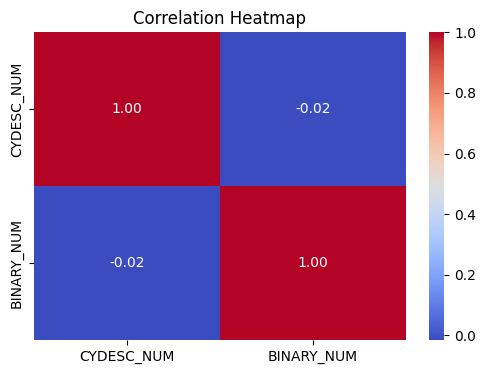

In [104]:
# Compute correlation
correlation_matrix = data[['CYDESC_NUM', 'BINARY_NUM']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

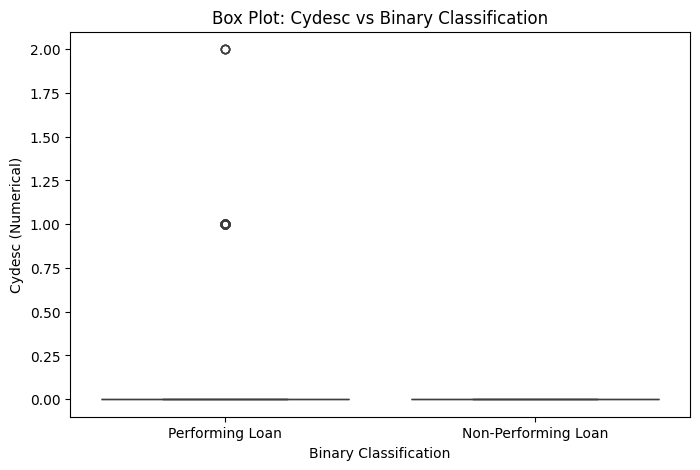

In [105]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Binary Classification'], y=data['CYDESC_NUM'])
plt.xlabel("Binary Classification")
plt.ylabel("Cydesc (Numerical)")
plt.title("Box Plot: Cydesc vs Binary Classification")
plt.show()

The box plot shows that most Cydesc values are concentrated near 0 for both "Performing Loan" and "Non-Performing Loan," with minimal variability. The boxes are thin, reflecting the lack of significant spread in the data.

However, a few outliers with values around 1 and 2 appear in both categories, deviating from the main distribution. These outliers might indicate unique patterns or anomalies requiring further analysis.

In [106]:
# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['CYDESC'], prefix='CYDESC')

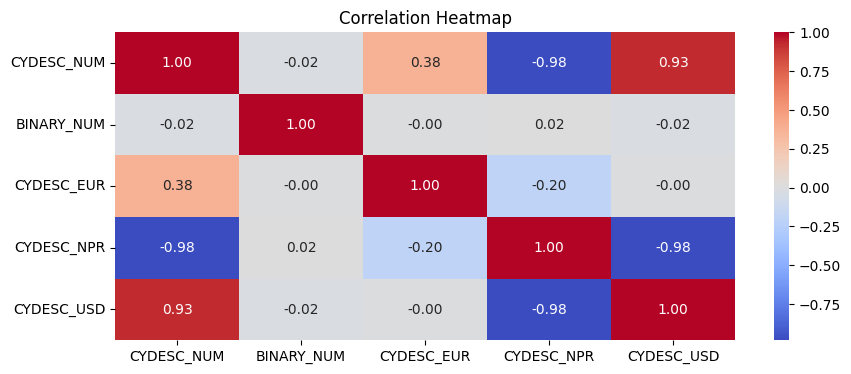

In [107]:
# Compute correlation
correlation_matrix = data_encoded[['CYDESC_NUM', 'BINARY_NUM', 'CYDESC_EUR',
       'CYDESC_NPR', 'CYDESC_USD']].corr()

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap visualizes the relationships between different variables, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation).  
The CYDESC_NUM and CYDESC_USD exhibit a strong positive correlation (0.93), while CYDESC_NUM and CYDESC_NPR show a strong negative correlation (-0.98), indicating inverse relationships

- **For Loan_Type**

In [108]:
data['LOAN_TYPE'].unique()

array(['OVERDRAFT', 'TERM LOAN', 'WORKING CAPITAL LOAN', 'DEMAND LOAN',
       'CREDIT PURCHASE', 'TRUST RECEIPT LOAN', 'SOURYA URJA LOAN',
       'AUTO LOAN', 'COVID EXTENSION', 'SAM LOAN', 'BRIDGE GAP LOAN',
       'CONSORTIUM LOAN', 'FD LOAN', 'CHANNEL FINANCING', 'FORCE LOAN',
       'MARGIN LENDING LOAN', 'HOUSING LOAN', 'PROPERTY FINANCING',
       'EDUCATION LOAN', 'AGRICULTURE LOAN', 'SPECIAL LOAN',
       'LOAN AGAINST FIXED DEPOSIT', 'EMPLOYEE LOAN ON SALALRY',
       'REFINANCE'], dtype=object)

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
#apply label encoder
label_encode = LabelEncoder()
data['Loan_Type_Encoded'] = label_encode.fit_transform(data['LOAN_TYPE'])

In [111]:
cor = data[['Loan_Type_Encoded','BINARY_NUM']].corr()
cor

,Loan_Type_Encoded,BINARY_NUM
Loan_Type_Encoded,1.000000,0.005301
BINARY_NUM,0.005301,1.000000


<Axes: >

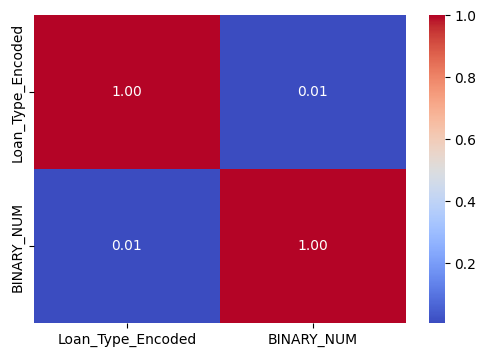

In [112]:
#heatmap between Loan type encoded and binary number based on label encoding
plt.figure(figsize=(6, 4))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

In [113]:
#apply one hot encoding

Loan_Type_Dummies = pd.get_dummies(data['LOAN_TYPE'], prefix = 'Loan_Type').astype(int) 
dummie_data = pd.concat([data, Loan_Type_Dummies],axis = 1)
dummie_data

,BRANCHCODE,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,ACOPENDATE,...,Loan_Type_MARGIN LENDING LOAN,Loan_Type_OVERDRAFT,Loan_Type_PROPERTY FINANCING,Loan_Type_REFINANCE,Loan_Type_SAM LOAN,Loan_Type_SOURYA URJA LOAN,Loan_Type_SPECIAL LOAN,Loan_Type_TERM LOAN,Loan_Type_TRUST RECEIPT LOAN,Loan_Type_WORKING CAPITAL LOAN
0,990.0,HO,NPR,C00000727,ODA,AWC02,OVERDRAFT CORPORATE,OVERDRAFT,CB,2009-04-02,...,0,1,0,0,0,0,0,0,0,0
1,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2023-02-07,...,0,0,0,0,0,0,0,1,0,0
2,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-03-13,...,0,0,0,0,0,0,0,1,0,0
3,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2021-04-01,...,0,0,0,0,0,0,0,1,0,0
4,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-09-01,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54675,193.0,NPST7,NPR,R02063143,LAA,CHF11,HOUSING LOAN RETAIL (FIXED RATE),WORKING CAPITAL LOAN,RE,2023-04-04,...,0,0,0,0,0,0,0,0,0,1
54676,193.0,NPST7,NPR,R02066979,LAA,CED11,EDUCATION LOAN RETAIL,EDUCATION LOAN,RE,2023-04-18,...,0,0,0,0,0,0,0,0,0,0
54677,193.0,NPST7,NPR,R02067007,LAA,CHF11,HOUSING LOAN RETAIL (FIXED RATE),WORKING CAPITAL LOAN,RE,2023-04-30,...,0,0,0,0,0,0,0,0,0,1
54678,193.0,NPST7,NPR,R02071843,LAA,CHF11,HOUSING LOAN RETAIL (FIXED RATE),WORKING CAPITAL LOAN,RE,2023-05-07,...,0,0,0,0,0,0,0,0,0,1


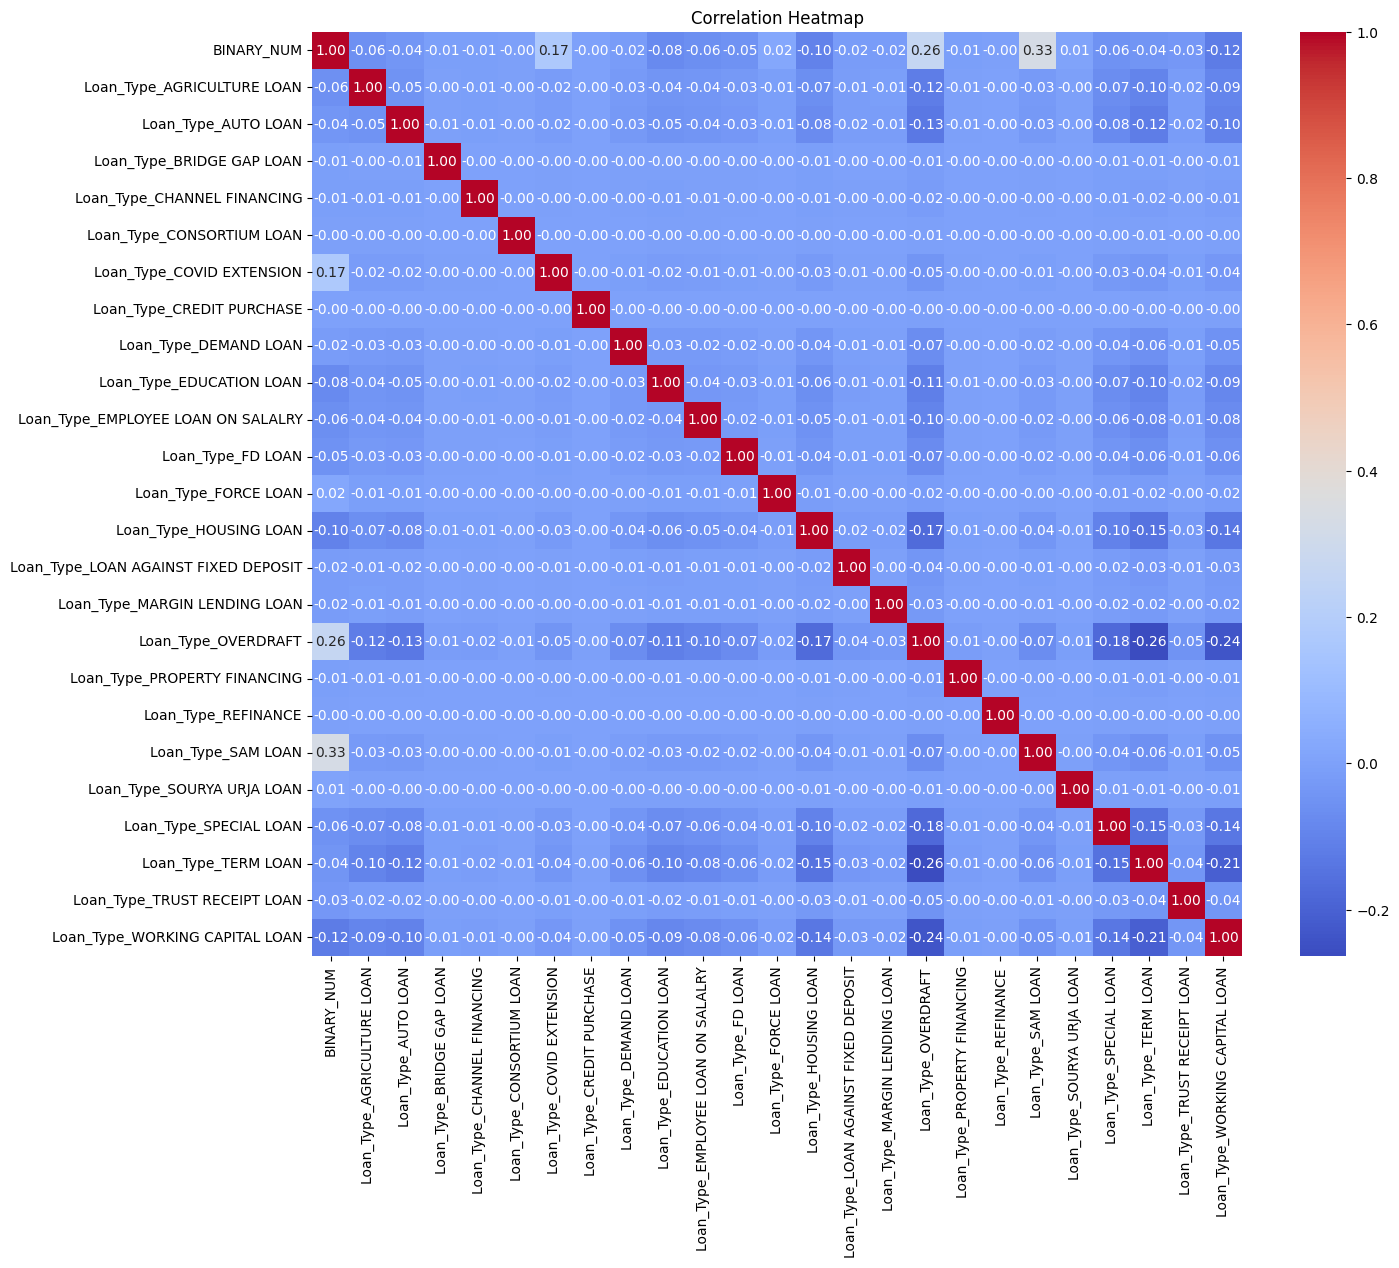

In [114]:
#heatmap based on one hot encoding
correlation_matrix = dummie_data[['BINARY_NUM','Loan_Type_AGRICULTURE LOAN', 'Loan_Type_AUTO LOAN',
       'Loan_Type_BRIDGE GAP LOAN', 'Loan_Type_CHANNEL FINANCING',
       'Loan_Type_CONSORTIUM LOAN', 'Loan_Type_COVID EXTENSION',
       'Loan_Type_CREDIT PURCHASE', 'Loan_Type_DEMAND LOAN',
       'Loan_Type_EDUCATION LOAN', 'Loan_Type_EMPLOYEE LOAN ON SALALRY',
       'Loan_Type_FD LOAN', 'Loan_Type_FORCE LOAN', 'Loan_Type_HOUSING LOAN',
       'Loan_Type_LOAN AGAINST FIXED DEPOSIT', 'Loan_Type_MARGIN LENDING LOAN',
       'Loan_Type_OVERDRAFT', 'Loan_Type_PROPERTY FINANCING',
       'Loan_Type_REFINANCE', 'Loan_Type_SAM LOAN',
       'Loan_Type_SOURYA URJA LOAN', 'Loan_Type_SPECIAL LOAN',
       'Loan_Type_TERM LOAN', 'Loan_Type_TRUST RECEIPT LOAN',
       'Loan_Type_WORKING CAPITAL LOAN']].corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### I. Treating imbalance dataset

In [115]:
# Check class distribution
print(data['Binary Classification'].value_counts())

Binary Classification
Performing Loan        47832
Non-Performing Loan     6848
Name: count, dtype: int64


In [116]:
#pip install imbalanced-learn

In [117]:
data.head()

,BRANCHCODE,STATE,CYDESC,CLIENTCODE,SCHM_TYPE,ACTYPE,ACTYPEDESC,LOAN_TYPE,SEGMENT,ACOPENDATE,...,LLP Amount,DCGF & Hydro Moratorium,Additional LLP,Total LLP,Binary Classification,SEGMENT_NUM,BINARY_NUM,STATE_NUM,CYDESC_NUM,Loan_Type_Encoded
0,990.0,HO,NPR,C00000727,ODA,AWC02,OVERDRAFT CORPORATE,OVERDRAFT,CB,2009-04-02,...,2.618083e+04,0,0,2.618083e+04,Performing Loan,0,0,0,0,15
1,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2023-02-07,...,5.010897e+05,0,0,5.010897e+05,Performing Loan,1,0,0,0,21
2,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-03-13,...,1.074284e+05,0,0,1.074284e+05,Performing Loan,1,0,0,0,21
3,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2021-04-01,...,1.288171e+06,0,0,1.288171e+06,Performing Loan,1,0,0,0,21
4,990.0,HO,NPR,C00002070,LAA,CTW09,TERM LOAN MICRO FINANCE WHOLESALE,TERM LOAN,MF,2019-09-01,...,1.385334e+05,0,0,1.385334e+05,Performing Loan,1,0,0,0,21


<mark> **1. Oversampling** <mark>

In [118]:
from imblearn.over_sampling import RandomOverSampler

# Separate features (X) and target (y)
X = data.drop(columns=['Binary Classification'])
y = data['Binary Classification']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled data into a new DataFrame
data_oversampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the distribution after oversampling
print(data_oversampled['Binary Classification'].value_counts())

Binary Classification
Performing Loan        47832
Non-Performing Loan    47832
Name: count, dtype: int64


<mark> **2. Undersampling** <mark>

In [119]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine resampled data into a new DataFrame
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the distribution after undersampling
print(data_resampled['Binary Classification'].value_counts())


Binary Classification
Non-Performing Loan    6848
Performing Loan        6848
Name: count, dtype: int64


<mark> **3. SMOTE** <mark>

In [120]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Select only numerical columns (excluding datetime and categorical)
X_numeric = X.select_dtypes(include=[np.number])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numeric, y)

# Combine resampled data into a DataFrame
data_SMOTE = pd.concat([pd.DataFrame(X_resampled, columns=X_numeric.columns), 
                            pd.DataFrame(y_resampled, columns=['Binary Classification'])], axis=1)

# Check the new class distribution
print(data_SMOTE['Binary Classification'].value_counts())


Binary Classification
Performing Loan        47832
Non-Performing Loan    47832
Name: count, dtype: int64


##### <mark> To make the dataset balanced, Oversampling was choosen as best option as the dataset is not big undersampling will decrease the datapoints and hence result in the loss of data insights. Also, SMOTE is used for the numerical variable only but the dataset has data as objects and datetime. <mark>

### J. Normalizing columns namely LCY_outstanding and Limit

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Reshape the column into 2D before transforming
data_oversampled['LCY_outstanding_normalized'] = scaler.fit_transform(data_oversampled[['LCY_OUTSTANDING']])
data_oversampled['LIMIT_normalized'] = scaler.fit_transform(data_oversampled[['LIMIT']])

### J. Training baseline model

In [122]:
# Target variable and Feature vectors

X = data_oversampled[['INTRATE', 
                    'NORMALACCRUED',
                    'PRINOVERDUE', 
                    'INTERESTOVERDUE',
                    'PENAL_INT_ON_INT', 
                    'LLP Amount',
                    'DCGF & Hydro Moratorium',
                    'Additional LLP', 
                    'Total LLP', 
                    'SEGMENT_NUM', 
                    'STATE_NUM', 
                    'CYDESC_NUM',
                    'Loan_Type_Encoded',
                    'PRINODDAYS',
                    'INTOVDDAYS',
                    'LCY_outstanding_normalized',
                    'LIMIT_normalized'
                     ]]

y=data_oversampled['BINARY_NUM']

### 1. Random Forest Model

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 decision trees
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9550
           1       1.00      1.00      1.00      9583

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



In [124]:
feature_importances = rf_model.feature_importances_

# Convert to a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Print feature importance
print(feature_importance_df)

                       Feature  Importance
14                  INTOVDDAYS    0.203971
13                  PRINODDAYS    0.184545
16            LIMIT_normalized    0.132036
2                  PRINOVERDUE    0.108923
4             PENAL_INT_ON_INT    0.093975
15  LCY_outstanding_normalized    0.079667
3              INTERESTOVERDUE    0.047246
5                   LLP Amount    0.037942
1                NORMALACCRUED    0.032917
8                    Total LLP    0.030477
0                      INTRATE    0.027436
12           Loan_Type_Encoded    0.014688
9                  SEGMENT_NUM    0.001951
7               Additional LLP    0.001927
10                   STATE_NUM    0.001374
6      DCGF & Hydro Moratorium    0.000911
11                  CYDESC_NUM    0.000014


### 2. Xgboost Model

In [126]:
import xgboost as xgb

In [127]:
# Convert data into DMatrix format (optional, but useful for optimization)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define model parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Number of classes
    'max_depth': 4,
    'eta': 0.3,  # Learning rate
    'eval_metric': 'mlogloss'
}

# Train model
num_rounds = 50
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred = model.predict(dtest)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [128]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

model = xgb.XGBClassifier(**params)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy: 0.9980


### 3. Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = data_oversampled[['INTRATE', 
                    'NORMALACCRUED',
                    'PRINOVERDUE', 
                    'INTERESTOVERDUE',
                    'PENAL_INT_ON_INT', 
                    'LLP Amount',
                    'DCGF & Hydro Moratorium',
                    'Additional LLP', 
                    'Total LLP', 
                    'SEGMENT_NUM', 
                    'STATE_NUM', 
                    'CYDESC_NUM',
                    'Loan_Type_Encoded',
                    'PRINODDAYS',
                    'INTOVDDAYS',
                    'LCY_outstanding_normalized',
                    'LIMIT_normalized'
                     ]]

y=data_oversampled['BINARY_NUM']

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate model performance
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      9550
           1       0.96      0.83      0.89      9583

    accuracy                           0.90     19133
   macro avg       0.90      0.90      0.90     19133
weighted avg       0.90      0.90      0.90     19133



### 3A. Linear Discriminant Analysis

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Make predictions
y_pred_lda = lda.predict(X_test)

# Evaluate model performance
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"Linear Discriminant Analysis: {accuracy_lda:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

Linear Discriminant Analysis: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.99      0.83      9550
           1       0.98      0.59      0.74      9583

    accuracy                           0.79     19133
   macro avg       0.85      0.79      0.78     19133
weighted avg       0.85      0.79      0.78     19133



### 3B. Stochastic Gradient Descent

In [131]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

# Train the model
sgd.fit(X_train, y_train)

# Make predictions
y_pred_sgd = sgd.predict(X_test)

# Evaluate model performance
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"Linear Discriminant Analysis: {accuracy_sgd:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_sgd))

Linear Discriminant Analysis: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.62      0.75      9550
           1       0.72      0.96      0.82      9583

    accuracy                           0.79     19133
   macro avg       0.83      0.79      0.79     19133
weighted avg       0.83      0.79      0.79     19133



### 3C. SGD with Hyper Parameter

In [132]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SGD classifier for Logistic Regression with mini-batch
sgd_clf = SGDClassifier(loss='log_loss',  # Logistic Regression
                        max_iter=1000,  
                        tol=1e-3,  
                        random_state=42, 
                        learning_rate='optimal', 
                        early_stopping=True)

# Train the model using mini-batch gradient descent
sgd_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_sgd = sgd_clf.predict(X_test_scaled)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Accuracy: {accuracy_sgd:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_sgd))

SGD Classifier Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      9550
           1       0.98      0.89      0.93      9583

    accuracy                           0.94     19133
   macro avg       0.94      0.94      0.94     19133
weighted avg       0.94      0.94      0.94     19133



### 3D. SGD with L2 Regularization

In [133]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SGDClassifier (Mini-Batch Gradient Descent)
sgd = SGDClassifier(loss='log_loss',  # Logistic Regression
                    max_iter=1000,    # Allow sufficient training
                    tol=1e-3,         # Convergence criteria
                    random_state=42,
                    learning_rate='optimal',  # Adapts learning rate
                    early_stopping=True,      # Stops when validation loss stops improving
                    alpha=0.01)  # L2 Regularization (adjustable)

# Train the model
sgd.fit(X_train_scaled, y_train)

# Make predictions
y_pred_sgd = sgd.predict(X_test_scaled)

# Evaluate model performance
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Accuracy: {accuracy_sgd:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_sgd))

SGD Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      9550
           1       0.99      0.79      0.88      9583

    accuracy                           0.89     19133
   macro avg       0.91      0.89      0.89     19133
weighted avg       0.91      0.89      0.89     19133



### Testing Model with Unseen Dataset with all features

In [134]:
unseen_data= pd.read_excel('Unseen_dataset.xlsx')

In [135]:
unseen_data.head(2)

,SOL_ID,SCHEME,SCHM_TYPE,BORROWER_TYPE,CYDESC,LCY_OUTSTANDING,LIMIT,SANCTION_DATE,LIM_EXP_DATE,LOAN_EXP_DATE,...,Product,Security,Types,LOAN_TYPE,Loan 9.1,Basel code,Basel,Final Classification,LLP Rate,Total LLP
0,41,DL801 [DEMAND LOAN],LAA,Institutional,NPR,2500000.0,2500000.0,2022-12-15,2023-07-31,2023-07-31,...,5.1,5.1.1,Demand and other Working Capital Loans,DEMAND LOAN,6.1.1.11 Private Non-Financial Corporations,9,Past due claims (except for claims secured by ...,Sub Standard,0.250,625000.0
1,51,DL801 [DEMAND LOAN],LAA,Institutional,NPR,5000000.0,5000000.0,2023-01-12,2023-07-31,2023-07-31,...,5.2,5.1.1,Demand and other Working Capital Loans,DEMAND LOAN,6.1.1.11 Private Non-Financial Corporations,2,Claims on Domestic Corporates (Unrated),Pass Loan,0.013,65000.0


In [136]:
#encoding
# Creating a mapping dictionary
cydecs_mapping = {val: idx for idx, val in enumerate(unseen_data['CYDESC'].unique())}
loan_type_mapping = {val: idx for idx, val in enumerate(unseen_data['LOAN_TYPE'].unique())}
schm_type = {val: idx for idx, val in enumerate(unseen_data['SCHM_TYPE'].unique())}

# Applying the mapping
unseen_data['CYDESC_NUM'] = unseen_data['CYDESC'].map(cydecs_mapping)
unseen_data['Loan_Type_Encoded'] = unseen_data['LOAN_TYPE'].map(loan_type_mapping)
unseen_data['SCHM_TYPE'] = unseen_data['SCHM_TYPE'].map(schm_type)


In [137]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

# Reshape the column into 2D before transforming
#unseen_data['LCY_outstanding_normalized'] = scaler.fit_transform(unseen_data[['LCY_OUTSTANDING']])
#unseen_data['LIMIT_normalized'] = scaler.fit_transform(unseen_data[['LIMIT']])

In [138]:
unseen_data['Binary Classification'] = unseen_data['Final Classification'].apply(
    lambda x: 'Performing Loan' if x in ['Pass', 'Watchlist'] else 'Non-Performing Loan')

In [139]:
# Creating a mapping dictionary
classification_mapping = {val: idx for idx, val in enumerate(unseen_data['Binary Classification'].unique())}

# Applying the mapping
unseen_data['BINARY_NUM'] = unseen_data['Binary Classification'].map(classification_mapping)

In [140]:
# Add missing columns with default values (example: 0)
#for col in ['PRINOVERDUE', 
#            'INTERESTOVERDUE',
#            'PENAL_INT_ON_INT', 
#            'LLP Amount',
#            'DCGF & Hydro Moratorium',
#            'Additional LLP', 
#           'STATE_NUM', 
#           'PRINODDAYS',
#            'INTOVDDAYS',
#            'SEGMENT_NUM'
#                    ]:
#    unseen_data[col] = 0  

In [141]:
# Drop rows with NaN values in any column
#unseen_data = unseen_data.dropna()

In [142]:
X_unseen=unseen_data[['INTRATE',
               'SCHM_TYPE',
               'NORMALACCRUED',
               'Total LLP', 
               'CYDESC_NUM',
               'Loan_Type_Encoded',
               'LCY_OUTSTANDING',
               'LIMIT']]

y_unseen=unseen_data['BINARY_NUM']


# X_train_unseen, X_test_unseen, y_train_unseen, y_test_unseen = train_test_split(X_unseen,y_unseen, test_size=0.3, random_state=42)
# # Make predictions
# y_pred_sgd_unseen = sgd.predict(X_test_unseen)

# accuracy_sgd_unseen = accuracy_score(y_test_unseen, y_pred_sgd_unseen)
# print(f"SGD Accuracy: {accuracy_sgd_unseen:.2f}")
# print("Classification Report:\n", classification_report(y_test_unseen,y_pred_sgd_unseen))

### Train again with 8 features

In [143]:
data.columns

Index(['BRANCHCODE', 'STATE', 'CYDESC', 'CLIENTCODE', 'SCHM_TYPE', 'ACTYPE',
       'ACTYPEDESC', 'LOAN_TYPE', 'SEGMENT', 'ACOPENDATE', 'INTRATE',
       'OUTSTANDING', 'MID_RATE', 'LCY_OUTSTANDING', 'LIMIT',
       'LIMITEXPIRYDATE', 'EI_END_DATE', 'NORMALACCRUED', 'PRINOVERDUE',
       'PRIN_OVERDUE_DATE', 'PRINODDAYS', 'INTERESTOVERDUE',
       'INTEREST_OVERDUE_DATE', 'INTOVDDAYS', 'PENAL_INT_ON_INT',
       'CLASSIFICATION', 'Final Classification', 'LLP%', 'LLP Amount',
       'DCGF & Hydro Moratorium', 'Additional LLP', 'Total LLP',
       'Binary Classification', 'SEGMENT_NUM', 'BINARY_NUM', 'STATE_NUM',
       'CYDESC_NUM', 'Loan_Type_Encoded'],
      dtype='object')

In [144]:
data_eight = data[['SCHM_TYPE','CYDESC_NUM','LCY_OUTSTANDING','LIMIT','INTRATE','NORMALACCRUED','Loan_Type_Encoded','Total LLP','BINARY_NUM']]
data_eight.head(2)

,SCHM_TYPE,CYDESC_NUM,LCY_OUTSTANDING,LIMIT,INTRATE,NORMALACCRUED,Loan_Type_Encoded,Total LLP,BINARY_NUM
0,ODA,0,2013909.95,10000000.0,12.86,0.00,15,26180.82935,0
1,LAA,0,38545363.82,40000000.0,11.81,865485.98,21,501089.72966,0


In [145]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
data_eight["SCHM_TYPE"] = label_encoder.fit_transform(data_eight["SCHM_TYPE"])
#data_eight["CYDESC"] = label_encoder.fit_transform(data_eight["CYDESC"])
#data_eight["LOAN_TYPE"] = label_encoder.fit_transform(data_eight["LOAN_TYPE"])
#data_eight['LCY_outstanding_normalized'] = scaler.fit_transform(data_eight[['LCY_OUTSTANDING']])
#data_eight['LIMIT_normalized'] = scaler.fit_transform(data_eight[['LIMIT']])

data_eight.head(5)

,SCHM_TYPE,CYDESC_NUM,LCY_OUTSTANDING,LIMIT,INTRATE,NORMALACCRUED,Loan_Type_Encoded,Total LLP,BINARY_NUM
0,1,0,2013909.95,10000000.0,12.86,0.00,15,2.618083e+04,0
1,0,0,38545363.82,40000000.0,11.81,865485.98,21,5.010897e+05,0
2,0,0,8263725.72,100000000.0,10.45,16561.41,21,1.074284e+05,0
3,0,0,99090062.21,150000000.0,10.45,198587.34,21,1.288171e+06,0
4,0,0,10656416.89,50000000.0,10.45,113007.65,21,1.385334e+05,0


In [146]:
X_eight = data_eight[['INTRATE', 
                    'NORMALACCRUED', 
                    'Total LLP', 
                    'SCHM_TYPE', 
                    'CYDESC_NUM',
                    'Loan_Type_Encoded',
                    'LCY_OUTSTANDING',
                    'LIMIT'
                     ]]

y_eight=data_eight['BINARY_NUM']

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_eight, y_eight, test_size=0.2, random_state=42)

# Initialize SGDClassifier
sgd = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42, learning_rate="optimal", early_stopping=True, alpha=0.01)

# Train model
sgd.fit(X_train, y_train)

# Predictions
y_pred = sgd.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"SGD Accuracy with Seen Data (8 features): {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

SGD Accuracy with Seen Data (8 features): 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9575
           1       1.00      0.86      0.92      1361

    accuracy                           0.98     10936
   macro avg       0.99      0.93      0.96     10936
weighted avg       0.98      0.98      0.98     10936



In [153]:
coefficients = sgd.coef_[0]  # shape: (n_features,)
feature_names = X_eight.columns  # Get feature names from your DataFrame

# Create DataFrame of feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)  # Use absolute value for ranking
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

# Optional: Plot feature importances
# plt.figure(figsize=(8, 5))
# plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
# plt.xlabel("Absolute Coefficient Value (Importance)")
# plt.title("Feature Importance - SGDClassifier")
# plt.gca().invert_yaxis()  # Most important on top
# plt.tight_layout()
# plt.show()

Feature Importances:
              Feature    Coefficient     Importance
7              LIMIT -133175.460501  133175.460501
6    LCY_OUTSTANDING -132631.463441  132631.463441
1      NORMALACCRUED   35488.339812   35488.339812
2          Total LLP  -16695.257860   16695.257860
0            INTRATE     -21.245102      21.245102
5  Loan_Type_Encoded      -4.391183       4.391183
3          SCHM_TYPE      -1.489049       1.489049
4         CYDESC_NUM      -0.000672       0.000672


### Testing unseen data with 8 features

In [147]:
unseen_data.columns

Index(['SOL_ID', 'SCHEME', 'SCHM_TYPE', 'BORROWER_TYPE', 'CYDESC',
       'LCY_OUTSTANDING', 'LIMIT', 'SANCTION_DATE', 'LIM_EXP_DATE',
       'LOAN_EXP_DATE', 'SECTOR_CODE', 'SUB_SECTOR_CODE',
       'BORROWER_CATEGORY_CODE', 'FIRST_INT_DUE_DATE', 'FIRST_PRIN_DUE_DATE',
       'MATURITY_DATE_NEW', 'INTRATE', 'NORMALACCRUED', 'Product', 'Security',
       'Types', 'LOAN_TYPE', 'Loan 9.1', 'Basel code', 'Basel',
       'Final Classification', 'LLP Rate', 'Total LLP', 'CYDESC_NUM',
       'Loan_Type_Encoded', 'Binary Classification', 'BINARY_NUM'],
      dtype='object')

In [148]:
notseen_data = unseen_data[['INTRATE',
                            'NORMALACCRUED',
                            'Total LLP',
                            'SCHM_TYPE',
                            'CYDESC_NUM',
                            'Loan_Type_Encoded',
                            'LCY_OUTSTANDING',
                            'LIMIT',
                            'BINARY_NUM']]

notseen_data=notseen_data.dropna()

In [149]:
notseen_data['BINARY_NUM'].value_counts()

BINARY_NUM
0    37734
1     1612
Name: count, dtype: int64

In [150]:
X_notseen=notseen_data[['INTRATE',
               'NORMALACCRUED',
               'Total LLP',
               'SCHM_TYPE',
               'CYDESC_NUM',
               'Loan_Type_Encoded',
               'LCY_OUTSTANDING',
               'LIMIT']]

y_notseen=notseen_data['BINARY_NUM']

X_train_notseen, X_test_notseen, y_train_notseen, y_test_notseen = train_test_split(X_notseen,y_notseen, test_size=0.3, random_state=42)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_notseen)
#_test_scaled = scaler.transform(X_test_notseen)

# Initialize SGDClassifier (Mini-Batch Gradient Descent)
sgd = SGDClassifier(loss='log_loss',  # Logistic Regression
                    max_iter=1000,    # Allow sufficient training
                    tol=1e-3,         # Convergence criteria
                    random_state=42,
                    learning_rate='optimal',  # Adapts learning rate
                    early_stopping=True,      # Stops when validation loss stops improving
                    alpha=0.01)  # L2 Regularization (adjustable)

# Train the model
sgd.fit(X_train_notseen, y_train_notseen)

# Make predictions
y_pred_sgd_notseen = sgd.predict(X_test_notseen)

# Evaluate model performance
accuracy_sgd = accuracy_score(y_test_notseen, y_pred_sgd_notseen)
print(f"SGD Accuracy with Unseen Data: {accuracy_sgd:.2f}")
print("Classification Report:\n", classification_report(y_test_notseen, y_pred_sgd_notseen))

SGD Accuracy with Unseen Data: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     11293
           1       0.00      0.00      0.00       511

    accuracy                           0.96     11804
   macro avg       0.48      0.50      0.49     11804
weighted avg       0.92      0.96      0.94     11804

